<h1><strong><u><font color='blue'>SafeCity : Multilabel Classification of Diverse Forms of Sexual Harrassment Personal Stories</font></u></strong></h1>

<h1><strong><font color='green'>Business Problem </font></strong></h1>
<h2><strong><li>Description</li></strong><h2>
<p>   &emsp;&emsp;   Many any women in the world out there are sexually harassed and assaulted by men. Women became helpless and cannot defend themselves because of lacking courage.
To shed the light on this issue Tarana Burke, an American activist from New York started Me too movement in 2006, on the Myspace social network to promote “empowerment through empathy”. This helped other women with similar experience to raise their voice against these activities and defend themselves. </p>
<p>Later in the October of 2017, an American actress Alyssa Milano posted on Twitter stating her views on the sexual harassment with a Metoo hashtag (#Metoo). This movement was widely spread that millions of people started sharing their stories with Metoo hashtags over social media gaining attention of large corporations and civilians.
On the same day of the tweet by Milano October 15,2017 there were more than 2,00,000 times tweets on Metoo hashtag was found and tweeted more than 5,00,000 times within next 24 hours.</p>
<p>
With these increasing number of personal stories, it became difficult to categorize these stories that are shared on the online forum SafeCity,which identifies the crime patterns and takes necessary actions to make a safer place.</p>
<h2><strong><li>Probelm Statement</li></strong><h2>
<p>By the help of machine learning we solve this task of automatically categorizing various forms of sexual harassment which would be greatly helpful in fighting against these crimes and attending the victims who need a quick medical treatment .
</p>
<p><b>Research paper : </b>	 https://arxiv.org/pdf/1809.04739v2.pdf</p>

<h2><strong><li>Real World / Business Objectives and Constraints</li></strong><h2>
<ol type="1">
  <li>  Incorrect labeling could mislead to take wrong decisions so we need high precisson.</li>
  <li>Missing a label may put the victim in danger so we need high recall.</li>
  <li>No strict latency constraints as long as it doesn't take too  much long.   </li>
</ol>

<h1><strong><font color='green'>Machine Learning Problem </font></strong></h1>

<h2><strong><li>Data Overview</li></strong><h2>

Dataset : https://github.com/swkarlekar/safecity/tree/master/multilabel_classification

we have data in three files : Train,Dev and Test

<p><b>Number of rows in train.csv </b>= 7201</p>
<p><b>Number of rows in dev.csv </b>= 990</p>
<p><b>Number of rows in test.csv </b>= 1701 </p>

All the Datafiles contain 4 columns: 

<p><b>Description (string object): </b> Personal story of a victim that was shared on social media with Metoo hashtag.</p>

<p><b>Commenting (integer): </b>Label for the description stating whether it belongs to Commenting category or not.</p>

<p><b>Ogling/Facial Expressions/Staring (integer): </b>Label for the description stating whether it belongs to any of the Ogling,Facial Expressions,Staring  categories or not.</p>

<p><b>Touching /Groping (integer): </b>Label for the description stating whether it belongs to any of Touching,Groping category or not.</p>


<h2><strong><li>Example Datapoint </li></strong><h2>

<p><b>Description : </b>I was at the tap when a boy came to pour water.  He found a 14 years old girl waiting  to fetch water and just grabbed her hands and dragged her away.</p>
<p><b>Commenting : </b>0</p>

<p><b>Ogling/Facial Expressions/Staring : </b>0</p>

<p><b>Touching /Groping : </b>1</p>

The Description falls into a single category of Touching/Groping






<h1><strong><font color='green'>Posing real world problem statement as a Machine Learning problem </font></strong></h1>

<h2><strong><li>Machine Learning problem </li></strong><h2>

<p>The problem is to label a story with any number of categories  categories that suits.</p>
<p>This problem can be matched to a Multilable Classification in Machine Learning.</p>


<p><b>Multilabel Classification : </b> It is a classification task where a Datapoint can be assigned to any number of labels. In our case the labels are not completely independent of each other.For example, An attacker who commented a women may or may not be touching her.</p>

<h2><strong><li>Performance metrics  </li></strong><h2>

F1-Score = 2 * (precision * recall) / (precision + recall)

<p>In case of multilabel classification we have two types in calculating F1-Scores-</p>

<p><b>Macro Averaged F1-Score : </b> In this case we simply calculate F1-Scores of each class individually and take the mean of F1_score to get overall F1-Score.

This doesn't account for any class imbalances.</p>

<p><b>Micro Averaged F1-Score : </b> In this case we calculate the precision and recall on entire classes by summing up all the TPs and Type Errors instead of doing them on individual class. Then we calculate the F1-Score as Harmonic mean of precision and recall.
</p>

<b>Refer : </b>https://www.kaggle.com/enforcer007/what-is-micro-averaged-f1-score

<p><b>Hamming loss : </b> It is the fraction of labels that are classified incorrectly.

Ex: if 2 labels were classified incorrectly out of 3.
Hamming loss = 2/3</p>

<p><b>Exact math ratio : </b> It indicates the percentage of samples that have all their labels classified correctly. It only cares about correct classification and ignores partially correct classifications.
</p>
<p>In this case study classification of each is very important so we will use macro F1-Score as our performance metric.
Because macro F1-score treats all the classes with equal importances whereas Micro F1-score only concentrates on all the classes combinedly.</p>

<h1><strong><font color='green'>Exploratoy Data Analysis </font></strong></h1>

In [1]:
#Importing the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re
from wordcloud import WordCloud,STOPWORDS
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import spacy

In [2]:
#Reading the csv files as pandas DataFrame
train=pd.read_csv('train.csv')
cv=pd.read_csv('dev.csv')
test=pd.read_csv('test.csv')
print('Shape of train data : ',train.shape)
print('Shape of cross-validation data : ',cv.shape)
print('Shape of test data : ',test.shape)

Shape of train data :  (7201, 4)
Shape of cross-validation data :  (990, 4)
Shape of test data :  (1701, 4)


In [3]:
print('Datatypes of each feature column : \n')
train.dtypes

Datatypes of each feature column : 



Description                          object
Commenting                            int64
Ogling/Facial Expressions/Staring     int64
Touching /Groping                     int64
dtype: object

In [4]:
train.head()

,Description,Commenting,Ogling/Facial Expressions/Staring,Touching /Groping
0,"Was walking along crowded street, holding mums...",0,0,1
1,This incident took place in the evening.I was ...,0,1,0
2,I WAS WAITING FOR THE BUS. A MAN CAME ON A BIK...,1,0,0
3,Incident happened inside the train,0,0,0
4,I witnessed an incident when a chain was bruta...,0,0,0


In [5]:
duplicates = train[train.duplicated(subset='Description')]
print('Total duplicates found was : ',len(duplicates))

Total duplicates found was :  542


In [6]:
train[train['Description']=='misbehaved']

,Description,Commenting,Ogling/Facial Expressions/Staring,Touching /Groping
180,misbehaved,1,0,0
199,misbehaved,0,0,1
367,misbehaved,0,0,0
460,misbehaved,0,0,0
790,misbehaved,1,0,0
884,misbehaved,0,0,0
965,misbehaved,0,0,1
1203,misbehaved,1,0,0
1505,misbehaved,0,0,1
1510,misbehaved,0,0,0


<p><b>Observations : </b>By checking the duplicates on a single description we can notice that many rows have been duplicated, this could have been happened while manual labeling of data where a single word is interpreted to fall into different categories in different circumstances.</p>
<p>To avoid this ambiguities we replace all the duplicates of a point with a single point having labels 1,1,1 </p>

In [7]:
def remove_duplicates(data):
  data.drop_duplicates(keep='first',inplace=True)
  duplicates = data[data.duplicated(subset='Description',keep=False)]
  dup_indexes=list(duplicates.index)
  data_indexes=list(data.index)
  data_is_duplicated=map(lambda index: 1 if index in dup_indexes else 0,data_indexes)
  data['is_duplicate']=list(data_is_duplicated)
  data['Commenting']=data.apply(lambda row: 1 if row['is_duplicate']==1 else row['Commenting'],axis=1)
  data['Ogling/Facial Expressions/Staring']=data.apply(lambda row: 1 if row['is_duplicate']==1 else row['Ogling/Facial Expressions/Staring'],axis=1)
  data['Touching /Groping']=data.apply(lambda row: 1 if row['is_duplicate']==1 else row['Touching /Groping'],axis=1)
  data.drop_duplicates(inplace=True)
  data.drop(['is_duplicate'],axis=1,inplace=True)

In [8]:
#Replacing the duplicates with 1,1,1

remove_duplicates(train)
remove_duplicates(cv)
remove_duplicates(test)

In [9]:
print('All the duplicate rows are removed keeping a single rows with 1,1,1 labels')
train[train['Description']=='misbehaved']

All the duplicate rows are removed keeping a single rows with 1,1,1 labels


,Description,Commenting,Ogling/Facial Expressions/Staring,Touching /Groping
180,misbehaved,1,1,1


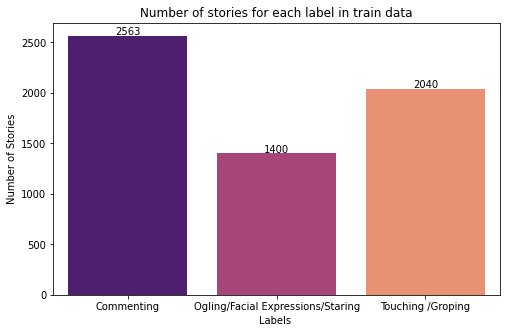

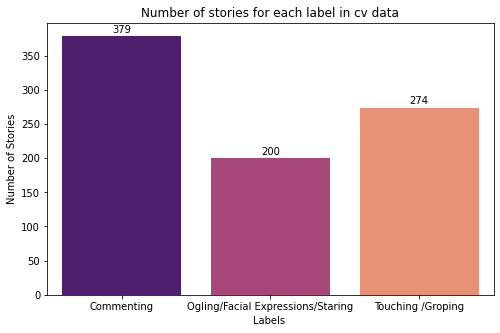

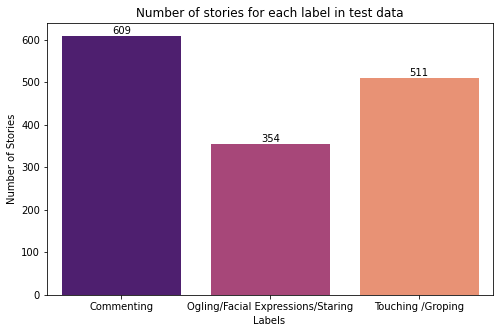

In [10]:
labels = ['Commenting','Ogling/Facial Expressions/Staring','Touching /Groping'] #Labels for x-axis on plot
plt.figure(figsize=(8,5))
label_counts=train.iloc[:,1:].sum() # To get the total number of points with corresponding label
ax= sns.barplot(labels, label_counts,palette='magma')
for i in range(3):
  ax.text(x=i,y=label_counts[i]+10,s=label_counts[i],ha='center') # For numeric text on barplot
plt.title("Number of stories for each label in train data")
plt.ylabel('Number of Stories')
plt.xlabel('Labels ')
plt.show()

plt.figure(figsize=(8,5))
label_counts=cv.iloc[:,1:].sum()
ax= sns.barplot(labels, label_counts,palette='magma')
for i in range(3):
  ax.text(x=i,y=label_counts[i]+5,s=label_counts[i],ha='center')
plt.title("Number of stories for each label in cv data")
plt.ylabel('Number of Stories')
plt.xlabel('Labels ')
plt.show()

plt.figure(figsize=(8,5))
label_counts=test.iloc[:,1:].sum()
ax= sns.barplot(labels, label_counts,palette='magma')
for i in range(3):
  ax.text(x=i,y=label_counts[i]+5,s=label_counts[i],ha='center')
plt.title("Number of stories for each label in test data")
plt.ylabel('Number of Stories')
plt.xlabel('Labels ')
plt.show()

<p><b>Observations : </b>By observing the above plots of Number of stories vs labels we can conclude that the data was split evenly between train,cv and test datasets.</p>
<p>There was a little class imbalance that can be ignored.</p>

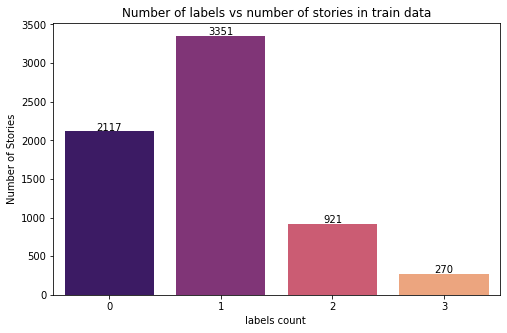

In [11]:
no_of_labels = ['0','1','2','3']
plt.figure(figsize=(8,5))
value_counts=train.iloc[:,1:].sum(axis=1).value_counts() # Summing up to get number of labels for a given datapoint
no_of_points_perlabel=[value_counts[i] for i in range(4)] # Getting value counts for specific label count to match with x-axis for plotting
ax= sns.barplot(no_of_labels, no_of_points_perlabel,palette='magma')
for i in range(4):
  ax.text(x=i,y=no_of_points_perlabel[i]+10,s=no_of_points_perlabel[i],ha='center')
plt.title("Number of labels vs number of stories in train data")
plt.ylabel('Number of Stories')
plt.xlabel('labels count ')
plt.show()

<b><p>Observations : </b>By observing above plot showing the number of labels for datapoints, we can say :
<li>very less datapoints have assigned to all the 3 labels</li>
<li>Most of the points have assigned with one label followed by points with no labeling at all</li>
</p>

<h1><strong><font color='green'>Data preprocessing </font></strong></h1>

<p>we will do the following preprocessing on text data :</p>
<li>Dencontraction of words</li>
<li>Removing special characters</li>
<li>Stopwords removal</li>
<li>Stemming</li>

In [12]:
def decontracted(text):
    '''Funtion to expand the sentences which are in short forms'''
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    return text

In [13]:
def remove_special_chars(text):
  '''This function removes the special chars from the text'''
  text = re.sub('[^A-Za-z0-9]+', ' ', text)
  text=text.lower()
  return text

In [14]:
nltk.download('stopwords')
stopWords=stopwords.words('english')
stemmer=SnowballStemmer('english')

#removing no,nor and not words from the english stopwords
stopWords.remove('not')
stopWords.remove('no')
stopWords.remove('nor')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [15]:
def remove_stopwords(text):
  '''This function removes the stopwords from the text'''
  text=[word for word in text.split() if not word in stopWords]
  text=' '.join(text)
  return text

In [16]:
def stemming(text):
  '''This function is to do stemming on words of text'''
  text=' '.join([stemmer.stem(word) for word in text.split()])
  return text

In [17]:
#Creating a copies of original data
final_train=train.copy()
final_cv=cv.copy()
final_test=test.copy()

In [18]:
def preprocess_text(text):
  '''This function does all the text preprocessing steps and return a clean text'''
  text=decontracted(text)
  text=remove_special_chars(text)
  text=remove_stopwords(text)
  text=stemming(text)
  return text

In [19]:
#Preprocessing the text data of train,cv and test

final_train['Description']=final_train['Description'].apply(preprocess_text)
final_cv['Description']=final_cv['Description'].apply(preprocess_text)
final_test['Description']=final_test['Description'].apply(preprocess_text)

In [20]:
def print_wordcloud(data,column):
  '''Printing word cloud on text data'''
  text=''
  for index,row in data.iterrows():
    if row[column]==1:
      text+=row['Description']+' '
  wc = WordCloud(stopwords=STOPWORDS,background_color="black",width=1000,height=800)
  wc.generate(text)
  plt.figure(figsize=(8,6))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title("Word Cloud for train text data on Class "+column,fontsize=20)
  plt.show()


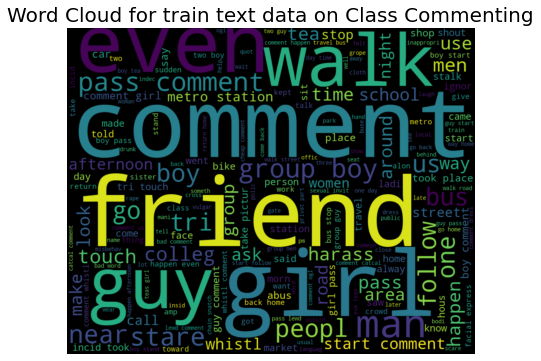

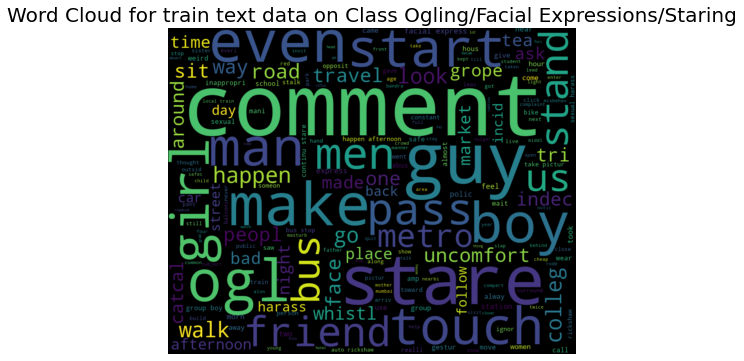

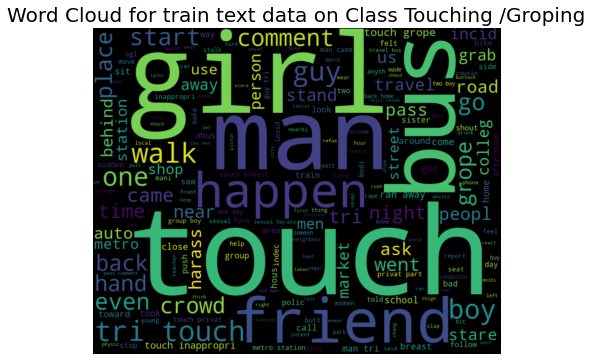

In [21]:
print_wordcloud(final_train,'Commenting')
print_wordcloud(final_cv,'Ogling/Facial Expressions/Staring')
print_wordcloud(final_test,'Touching /Groping')

<p><b>Observation : </b> The wordcloud displays the words with high frequency in larger font. In general we can note that most of the words here are apparantly used while describing a specific sexual harassment story.</p>

<h1><strong><font color='green'>Feature Engineering</font></strong></h1>

As part of Feature engineering we will extract these features from the text data :
<li>Creating tfidf-w2v representation using pretrained glove model (300-dim)</li>
<li>Length of the text by word level and character level (2-dim)</li>
<li>Sentiment scores of text data using nltk (4-dim)</li>
<li>Getting parts of speech tags count using spacy (5-dim)</li>

We will get a total of 311 features.

In [22]:
#Creating input and target data

X_train,y_train=pd.DataFrame(final_train.iloc[:,0]),final_train.iloc[:,1:]
X_cv,y_cv=pd.DataFrame(final_cv.iloc[:,0]),final_cv.iloc[:,1:]
X_test,y_test=pd.DataFrame(final_test.iloc[:,0]),final_test.iloc[:,1:]

In [23]:
print('Shapes of train,cross validate and test data :')
print('X_ train shape : ',X_train.shape,',  y_train shape : ', y_train.shape)
print('X_ cv shape :     ',X_cv.shape, '   ,  y_cv shape : ',y_cv.shape)
print('X_ test shape :  ',X_test.shape, ',  y_test shape : ',y_test.shape)

Shapes of train,cross validate and test data :
X_ train shape :  (6659, 1) ,  y_train shape :  (6659, 3)
X_ cv shape :      (940, 1)    ,  y_cv shape :  (940, 3)
X_ test shape :   (1608, 1) ,  y_test shape :  (1608, 3)


In [24]:
!gdown --id 1hhkiaxASRXppZjodw47DQ0oGAEc4cIhh --output wiki-news-300d-1M-subword.vec

Downloading...
From: https://drive.google.com/uc?id=1hhkiaxASRXppZjodw47DQ0oGAEc4cIhh
To: /content/wiki-news-300d-1M-subword.vec
2.26GB [00:26, 84.7MB/s]


In [25]:
!gdown --id 1iKDrZOHdytkIkDYj-1r-XRxq8_BpZP_8 --output glove.6B.300d.txt

Downloading...
From: https://drive.google.com/uc?id=1iKDrZOHdytkIkDYj-1r-XRxq8_BpZP_8
To: /content/glove.6B.300d.txt
1.04GB [00:24, 43.0MB/s]


In [26]:
fasttext_word_embeddings = dict()
fasttext_model = open('wiki-news-300d-1M-subword.vec',encoding='utf-8')
for line in fasttext_model: # For each line in vector file
  row = line.split() 
  word = row[0] # First word 
  vector = np.asarray(row[1:], dtype='float32') # Remaining text is 300 dimensional embeddings
  fasttext_word_embeddings[word] = vector # Creating a dictionay with word as key and embeddings  vector as value
fasttext_model.close()

fasttext_words=fasttext_word_embeddings.keys()

In [27]:
#Getting the word embedding from pretrained glove model.

glove_word_embeddings = dict()
glove_model = open('glove.6B.300d.txt')
for line in glove_model: # For each line in text file
  row = line.split() 
  word = row[0] # First word 
  vector = np.asarray(row[1:], dtype='float32') # Remaining text is 300 dimensional embeddings
  glove_word_embeddings[word] = vector # Creating a dictionay with word as key and embeddings  vector as value
glove_model.close()

glove_words=glove_word_embeddings.keys()

In [28]:
def get_embedding_features(data,word_embeddings,model_words):
  '''This function takes dataframe as input and returns fasttext vecotr respresent of text data(Description)'''
  vector_rep=[]
  preprocessed_descriptions = data['Description'].values
  for text in preprocessed_descriptions: # For each description
    vector=np.zeros(300)
    n=0
    for word in text.split():# For each word in vector
      if (word in model_words):
        vec=word_embeddings[word] #Getting the word's w2v representation
        vector+=vec
        n+=1
    if n!=0:
      vector/=n
    vector_rep.append(vector)
  return np.array(vector_rep)

In [29]:
tfidf_model = TfidfVectorizer() 
tfidf_model.fit(X_train['Description'].values) # Fitting the tfidf vectorizer on train data
# we are converting a dictionary with word as a key, and the idf as a value
idf_dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [30]:
def tfidf_w2v(data,word_embeddings,model_words):
  '''This function takes dataframe as input and returns tfidf-w2v vecotr respresent of text data(Description)'''
  tfidf_w2v_vectors=[]
  preprocessed_descriptions = data['Description'].values
  for text in preprocessed_descriptions: # For each description
    vector=np.zeros(300) #Intialising a 300-dim vector
    tf_idf_weight =0
    for word in text.split(): # For each word in vector
      if (word in model_words) and (word in tfidf_words):
        vec=word_embeddings[word] #Getting the word's w2v representation
        tf_idf = idf_dictionary[word]*(text.count(word)/len(text.split())) # Calulating tfidf value of word using idf values
        vector += (vec * tf_idf) # Computing weighted sum of tfidf-w2v
        tf_idf_weight += tf_idf
    if tf_idf_weight!=0:
      vector/=tf_idf_weight # Averaging the weighted sum of tfidf-w2v
    tfidf_w2v_vectors.append(vector)
  return np.array(tfidf_w2v_vectors)

In [31]:
X_train_fasttext_w2v=get_embedding_features(X_train,fasttext_word_embeddings,fasttext_words)
X_cv_fasttext_w2v=get_embedding_features(X_cv,fasttext_word_embeddings,fasttext_words)
X_test_fasttext_w2v=get_embedding_features(X_test,fasttext_word_embeddings,fasttext_words)
X_train_fasttext_w2v=pd.DataFrame(X_train_fasttext_w2v,columns=['embed_'+str(i) for i in range(300)])
X_cv_fasttext_w2v=pd.DataFrame(X_cv_fasttext_w2v,columns=['embed_'+str(i) for i in range(300)])
X_test_fasttext_w2v=pd.DataFrame(X_test_fasttext_w2v,columns=['embed_'+str(i) for i in range(300)])
print('\nAfter fasttext-w2v\n')
print('Shapes of tfidf-w2v features on train data : ',X_train_fasttext_w2v.shape)
print('Shapes of tfidf-w2v features on cv data : ',X_cv_fasttext_w2v.shape)
print('Shapes of tfidf-w2v features on test data : ',X_test_fasttext_w2v.shape)


After fasttext-w2v

Shapes of tfidf-w2v features on train data :  (6659, 300)
Shapes of tfidf-w2v features on cv data :  (940, 300)
Shapes of tfidf-w2v features on test data :  (1608, 300)


In [32]:
X_train_fasttext_tfidf_w2v=tfidf_w2v(X_train,fasttext_word_embeddings,fasttext_words)
X_cv_fasttext_tfidf_w2v=tfidf_w2v(X_cv,fasttext_word_embeddings,fasttext_words)
X_test_fasttext_tfidf_w2v=tfidf_w2v(X_test,fasttext_word_embeddings,fasttext_words)
X_train_fasttext_tfidf_w2v=pd.DataFrame(X_train_fasttext_tfidf_w2v,columns=['embed_'+str(i) for i in range(300)])
X_cv_fasttext_tfidf_w2v=pd.DataFrame(X_cv_fasttext_tfidf_w2v,columns=['embed_'+str(i) for i in range(300)])
X_test_fasttext_tfidf_w2v=pd.DataFrame(X_test_fasttext_tfidf_w2v,columns=['embed_'+str(i) for i in range(300)])
print('\nAfter fasttext-tfidf \n')
print('Shapes of tfidf-w2v features on train data : ',X_train_fasttext_tfidf_w2v.shape)
print('Shapes of tfidf-w2v features on cv data : ',X_cv_fasttext_tfidf_w2v.shape)
print('Shapes of tfidf-w2v features on test data : ',X_test_fasttext_tfidf_w2v.shape)


After fasttext-tfidf 

Shapes of tfidf-w2v features on train data :  (6659, 300)
Shapes of tfidf-w2v features on cv data :  (940, 300)
Shapes of tfidf-w2v features on test data :  (1608, 300)


In [33]:
X_train_glove_w2v=get_embedding_features(X_train,glove_word_embeddings,glove_words)
X_cv_glove_w2v=get_embedding_features(X_cv,glove_word_embeddings,glove_words)
X_test_glove_w2v=get_embedding_features(X_test,glove_word_embeddings,glove_words)
X_train_glove_w2v=pd.DataFrame(X_train_glove_w2v,columns=['embed_'+str(i) for i in range(300)])
X_cv_glove_w2v=pd.DataFrame(X_cv_glove_w2v,columns=['embed_'+str(i) for i in range(300)])
X_test_glove_w2v=pd.DataFrame(X_test_glove_w2v,columns=['embed_'+str(i) for i in range(300)])
print('\nAfter glove-w2v\n')
print('Shapes of tfidf-w2v features on train data : ',X_train_glove_w2v.shape)
print('Shapes of tfidf-w2v features on cv data : ',X_cv_glove_w2v.shape)
print('Shapes of tfidf-w2v features on test data : ',X_test_glove_w2v.shape)


After glove-w2v

Shapes of tfidf-w2v features on train data :  (6659, 300)
Shapes of tfidf-w2v features on cv data :  (940, 300)
Shapes of tfidf-w2v features on test data :  (1608, 300)


In [34]:
X_train_glove_tfidf_w2v=tfidf_w2v(X_train,glove_word_embeddings,glove_words)
X_cv_glove_tfidf_w2v=tfidf_w2v(X_cv,glove_word_embeddings,glove_words)
X_test_glove_tfidf_w2v=tfidf_w2v(X_test,glove_word_embeddings,glove_words)
X_train_glove_tfidf_w2v=pd.DataFrame(X_train_glove_tfidf_w2v,columns=['embed_'+str(i) for i in range(300)])
X_cv_glove_tfidf_w2v=pd.DataFrame(X_cv_glove_tfidf_w2v,columns=['embed_'+str(i) for i in range(300)])
X_test_glove_tfidf_w2v=pd.DataFrame(X_test_glove_tfidf_w2v,columns=['embed_'+str(i) for i in range(300)])
print('\nAfter glove-tfidf_w2v \n')
print('Shapes of tfidf-w2v features on train data : ',X_train_glove_tfidf_w2v.shape)
print('Shapes of tfidf-w2v features on cv data : ',X_cv_glove_tfidf_w2v.shape)
print('Shapes of tfidf-w2v features on test data : ',X_test_glove_tfidf_w2v.shape)


After glove-tfidf_w2v 

Shapes of tfidf-w2v features on train data :  (6659, 300)
Shapes of tfidf-w2v features on cv data :  (940, 300)
Shapes of tfidf-w2v features on test data :  (1608, 300)


In [35]:
def get_word_char_lengths(data):
  '''This function takes input dataframe and return with length of text by wordlevel and characterleve'''
  length_features=[]
  for index,row in data.iterrows():
    text=row['Description']
    length_wordlevel=len(text.split()) # Getting the number of words
    len_charlevel=len(text) # Getting the number characters including spaces
    length_features.append([length_wordlevel,len_charlevel])
  return pd.DataFrame(length_features,columns=['length_word_level','length_char_level'])

In [36]:
X_train_length_features=get_word_char_lengths(X_train)
X_cv_length_features=get_word_char_lengths(X_cv)
X_test_length_features=get_word_char_lengths(X_test)
print('\nAfter extracting length based features\n')
print('Shapes of length based features  on train data : ',X_train_length_features.shape )
print('Shapes of length based features  on cv data : ',X_cv_length_features.shape)
print('Shapes of length based features  on test data : ',X_test_length_features.shape)


After extracting length based features

Shapes of length based features  on train data :  (6659, 2)
Shapes of length based features  on cv data :  (940, 2)
Shapes of length based features  on test data :  (1608, 2)


In [37]:
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [38]:
def sentiment_score(data):
  '''This function takes dataframe as input and returns sentiment scores of text data'''
  sentiments=[]
  preprocessed_descriptions = data['Description'].values
  for text in preprocessed_descriptions:
    polarities=sid.polarity_scores(text) # Getting the sentiment scores of text
    sentiments.append(list(polarities.values()))
  return pd.DataFrame(sentiments,columns=['negative','neutral','positive','compound'])

In [39]:
X_train_sentiment_scores=sentiment_score(X_train)
X_cv_sentiment_scores=sentiment_score(X_cv)
X_test_sentiment_scores=sentiment_score(X_test)
print('\nAfter extracting sentiment features\n')
print('Shapes of sentiment features on train data : ',X_train_sentiment_scores.shape)
print('Shapes of sentiment features on cv data : ',X_cv_sentiment_scores.shape)
print('Shapes of sentiment features on test data : ',X_test_sentiment_scores.shape)


After extracting sentiment features

Shapes of sentiment features on train data :  (6659, 4)
Shapes of sentiment features on cv data :  (940, 4)
Shapes of sentiment features on test data :  (1608, 4)


In [40]:
# Concatenating all the features that are extracted from the input
#With fastext-w2v features
X_train_final = pd.concat([X_train_fasttext_w2v,X_train_length_features,X_train_sentiment_scores],axis=1)
X_cv_final = pd.concat([X_cv_fasttext_w2v,X_cv_length_features,X_cv_sentiment_scores],axis=1)
X_test_final = pd.concat([X_test_fasttext_w2v,X_test_length_features,X_test_sentiment_scores],axis=1)

In [41]:
print('Shape of final train data : ',X_train_final.shape,',  y_train shape : ', y_train.shape)
print('Shape of final cv data : ',X_cv_final.shape, '   ,  y_cv shape : ',y_cv.shape)
print('Shape of final test data : ',X_test_final.shape, ',  y_test shape : ',y_test.shape)

Shape of final train data :  (6659, 306) ,  y_train shape :  (6659, 3)
Shape of final cv data :  (940, 306)    ,  y_cv shape :  (940, 3)
Shape of final test data :  (1608, 306) ,  y_test shape :  (1608, 3)


In [42]:
#with fasttext tfidf features
X_train_final_1 = pd.concat([X_train_fasttext_tfidf_w2v,X_train_length_features,X_train_sentiment_scores],axis=1)
X_cv_final_1 = pd.concat([X_cv_fasttext_tfidf_w2v,X_cv_length_features,X_cv_sentiment_scores],axis=1)
X_test_final_1 = pd.concat([X_test_fasttext_tfidf_w2v,X_test_length_features,X_test_sentiment_scores],axis=1)

In [43]:
#with  glove features
X_train_final_2 = pd.concat([X_train_glove_w2v,X_train_length_features,X_train_sentiment_scores],axis=1)
X_cv_final_2 = pd.concat([X_cv_glove_w2v,X_cv_length_features,X_cv_sentiment_scores],axis=1)
X_test_final_2 = pd.concat([X_test_glove_w2v,X_test_length_features,X_test_sentiment_scores],axis=1)

In [44]:
#with glove tfidf features
X_train_final_3 = pd.concat([X_train_glove_tfidf_w2v,X_train_length_features,X_train_sentiment_scores],axis=1)
X_cv_final_3 = pd.concat([X_cv_glove_tfidf_w2v,X_cv_length_features,X_cv_sentiment_scores],axis=1)
X_test_final_3 = pd.concat([X_test_glove_tfidf_w2v,X_test_length_features,X_test_sentiment_scores],axis=1)

After feature engineering we get vector representation of text which is 306-dimensions.

<h1><strong><font color='green'>Machine Learning Models </font></strong></h1>

##Machine Learning Models



In [45]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import ClassifierChain
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import multilabel_confusion_matrix
from mlxtend.classifier import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from lightgbm import LGBMClassifier


In [46]:
X_train_final.head()

,embed_0,embed_1,embed_2,embed_3,embed_4,embed_5,embed_6,embed_7,embed_8,embed_9,embed_10,embed_11,embed_12,embed_13,embed_14,embed_15,embed_16,embed_17,embed_18,embed_19,embed_20,embed_21,embed_22,embed_23,embed_24,embed_25,embed_26,embed_27,embed_28,embed_29,embed_30,embed_31,embed_32,embed_33,embed_34,embed_35,embed_36,embed_37,embed_38,embed_39,...,embed_266,embed_267,embed_268,embed_269,embed_270,embed_271,embed_272,embed_273,embed_274,embed_275,embed_276,embed_277,embed_278,embed_279,embed_280,embed_281,embed_282,embed_283,embed_284,embed_285,embed_286,embed_287,embed_288,embed_289,embed_290,embed_291,embed_292,embed_293,embed_294,embed_295,embed_296,embed_297,embed_298,embed_299,length_word_level,length_char_level,negative,neutral,positive,compound
0,-0.009333,-0.009356,0.002633,0.006967,-0.013550,-0.014861,0.005067,-0.053167,-0.007122,0.000278,-0.001617,-0.024556,0.015783,0.002889,-0.004711,-0.003144,0.044511,0.005694,0.026739,-0.010089,0.007406,0.009156,-0.013250,0.027911,0.004833,-0.002617,0.013944,0.004506,-0.013006,0.001056,-0.000056,0.000833,0.003433,0.000217,-0.001056,-0.015522,0.020317,0.002128,-0.008672,-0.002411,...,0.012161,0.017472,0.008639,0.006428,-0.023278,0.067217,-0.074872,-0.025189,0.040922,-0.028100,0.008728,0.003089,0.007861,-0.000217,-0.010350,0.003606,0.010578,-0.015889,0.006172,0.012561,0.001633,-0.021156,-0.000678,0.005872,0.001494,0.010056,-0.033167,-0.003444,0.004472,-0.005667,0.006339,-0.003083,0.005044,-0.008972,19,93,0.000,0.849,0.151,0.4939
1,0.001525,-0.013000,0.009075,-0.001850,-0.002775,-0.004325,0.003850,-0.066150,0.005813,0.012313,-0.016313,-0.033088,0.016775,0.005650,-0.013050,0.006050,0.041137,0.008450,0.034250,-0.003463,-0.005813,0.001825,-0.007662,0.024487,0.005338,-0.005162,0.013388,0.003425,0.012675,0.013888,-0.011550,0.015588,-0.001337,-0.010987,0.001713,-0.015063,0.018825,0.021212,-0.004763,-0.004563,...,0.001475,0.001850,0.004213,0.003388,-0.028225,0.061150,-0.074513,-0.015687,0.028925,-0.022475,-0.010012,0.011687,0.000887,-0.015787,-0.016988,-0.002600,0.006150,-0.004413,0.003425,0.001325,0.011112,-0.026013,0.004325,0.005212,0.000875,0.002025,-0.007250,0.005388,0.021425,-0.001775,0.016713,0.005450,0.002737,-0.024050,9,47,0.000,1.000,0.000,0.0000
2,-0.009713,0.006750,0.003400,0.040175,-0.018275,-0.016763,-0.005463,-0.065850,0.018400,0.015475,-0.003975,-0.006962,0.010275,0.012613,-0.012150,-0.018287,0.050312,0.003250,0.029150,0.007025,0.000325,-0.001562,-0.030975,0.027500,0.010125,0.008038,0.011212,-0.005150,-0.002025,0.000087,-0.010525,0.028938,-0.011800,0.005312,-0.000350,-0.014800,0.028000,0.016113,0.002537,-0.014950,...,-0.000350,0.008038,0.011050,0.011650,-0.015238,0.059787,-0.077138,-0.019250,0.015537,-0.019987,0.008800,-0.006562,0.004612,-0.012275,0.008812,0.008538,0.007600,-0.011062,-0.008412,0.011412,-0.008625,-0.018600,0.016987,0.008750,0.012100,0.004950,-0.035763,-0.012338,-0.002513,0.007750,0.034587,0.012063,0.004187,-0.024013,9,47,0.000,1.000,0.000,0.0000
3,-0.007250,0.018450,-0.000400,0.011750,-0.000400,-0.015900,-0.019350,-0.044850,0.017400,-0.006450,-0.015300,0.006850,0.009100,0.007350,-0.008550,-0.002700,0.072000,0.014950,0.030950,-0.005800,-0.011250,-0.015800,-0.022200,0.022800,-0.016600,0.004950,0.006000,0.007150,-0.000200,-0.009200,0.001650,0.024900,0.012050,0.013350,-0.003300,-0.004250,0.006050,0.024500,-0.000400,-0.008650,...,-0.012050,0.005450,-0.011750,0.015700,-0.008550,0.048650,-0.053600,-0.033900,0.009100,-0.017900,-0.006850,0.018750,-0.000450,-0.018100,-0.012050,-0.021300,0.004300,-0.016400,-0.001050,0.008800,0.004200,-0.021700,0.019400,0.012800,0.007900,0.001350,-0.033350,-0.005650,0.013350,0.002400,0.013500,0.007050,0.018750,-0.004250,4,24,0.000,1.000,0.000,0.0000
4,-0.014437,-0.014775,0.003625,0.012425,-0.021363,-0.003713,-0.006475,-0.052313,0.003038,0.009250,-0.012038,-0.011650,0.012837,0.000525,-0.007263,-0.004975,0.037962,-0.000300,0.033625,0.006888,0.000050,0.000700,-0.005487,0.025562,-0.009312,-0.008187,0.010438,-0.003325,0.003037,-0.006225,0.

In [47]:
scaler = MinMaxScaler()
scaler.fit(X_train_final.iloc[:,300:])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [48]:
def scaler_transform(train,cv,test):
  train.iloc[:,300:]=scaler.transform(train.iloc[:,300:])
  cv.iloc[:,300:]=scaler.transform(cv.iloc[:,300:])
  test.iloc[:,300:]=scaler.transform(test.iloc[:,300:])

In [49]:
scaler_transform(X_train_final,X_cv_final,X_test_final)
scaler_transform(X_train_final_1,X_cv_final_1,X_test_final_1)
scaler_transform(X_train_final_2,X_cv_final_2,X_test_final_2)
scaler_transform(X_train_final_3,X_cv_final_3,X_test_final_3)

In [50]:
def get_metrics(predictions):
  hamming_loss=metrics.hamming_loss(y_test,predictions)
  emr=metrics.accuracy_score(y_test, predictions)
  hamming_score=1-hamming_loss
  f1_micro=f1_score(y_test, predictions, average='micro')
  f1_macro=f1_score(y_test, predictions, average='macro')

  return hamming_loss,emr,hamming_score,f1_micro,f1_macro
results=pd.DataFrame(columns=['Model','Word Embeddings','F1-Macro'])

In [51]:
def print_cf_matrix(cf_matrices):
  '''Function to print confusion Matrix'''
  fig, axes = plt.subplots(1, 3, sharex=True, figsize=(20,5))
  fig.suptitle('Confusion Matrices for all the three classes')
  classes=['Commenting', 'Ogling/Facial Expressions/Staring', 'Touching /Groping']
  for index,cf_matrix in enumerate(cf_matrices):
    group_names = ['TN','FP','FN','TP']
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues',ax=axes[index])
    axes[index].set_title('Confusion Matrix for class '+classes[index])

##<h2><strong>Using K-Nearest Neighbours</strong><h2>

Best params :  {'estimator__n_neighbors': 5, 'estimator__weights': 'distance'}
Exact match ratio : 0.4447
Hamming score : 0.7430
Micro F1-score : 0.5387
Macro F1-score : 0.5030



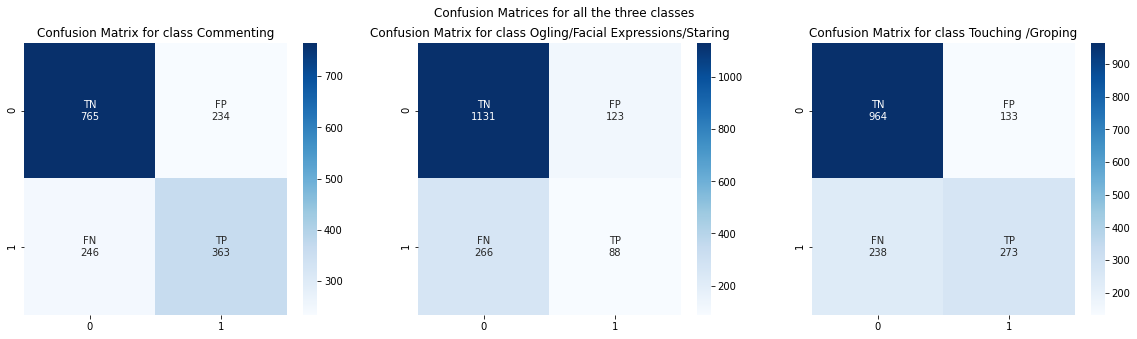

In [ ]:
clf = MultiOutputClassifier(KNeighborsClassifier())

param_grid={
    'estimator__n_neighbors':[3,5,7,10,15],
    'estimator__weights':['distance','uniform']
}
grid_clf_knn = GridSearchCV(clf,param_grid,scoring='f1_macro',n_jobs=-1)
grid_clf_knn.fit(pd.concat([X_train_final,X_cv_final]),pd.concat([y_train,y_cv]))

print('Best params : ',grid_clf_knn.best_params_)

clf_knn = grid_clf_knn.best_estimator_
predictions = clf_knn.predict (X_test_final)

hamming_loss,emr,hamming_score,f1_micro,f1_macro=get_metrics(predictions)
results.loc[len(results.index)]=['K-NN','Fasttext',f1_macro]

print("Exact match ratio : {:.4f}".format(emr))
print("Hamming score : {:.4f}".format(hamming_score))
print("Micro F1-score : {:.4f}".format(f1_micro))
print("Macro F1-score : {:.4f}".format(f1_macro))
print('')
cf_matrix=multilabel_confusion_matrix(y_test, predictions)
print_cf_matrix(cf_matrix)

Best params :  {'estimator__n_neighbors': 3, 'estimator__weights': 'distance'}
Exact match ratio : 0.3955
Hamming score : 0.7121
Micro F1-score : 0.5005
Macro F1-score : 0.4765



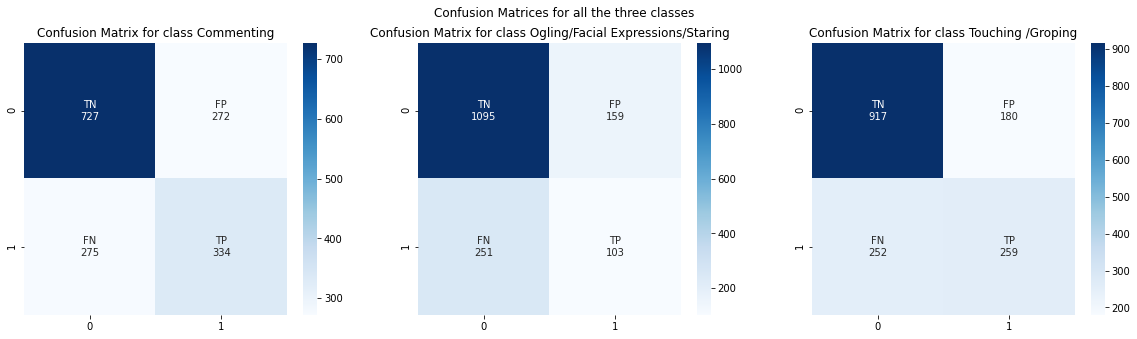

In [ ]:
clf = MultiOutputClassifier(KNeighborsClassifier())

param_grid={
    'estimator__n_neighbors':[3,5,7,10,15],
    'estimator__weights':['distance','uniform']
}
grid_clf_knn = GridSearchCV(clf,param_grid,scoring='f1_macro',n_jobs=-1)
grid_clf_knn.fit(pd.concat([X_train_final_1,X_cv_final_1]),pd.concat([y_train,y_cv]))

print('Best params : ',grid_clf_knn.best_params_)

clf_knn = grid_clf_knn.best_estimator_
predictions = clf_knn.predict (X_test_final_1)

hamming_loss,emr,hamming_score,f1_micro,f1_macro=get_metrics(predictions)
results.loc[len(results.index)]=['K-NN','Fasttext-tfidf',f1_macro]

print("Exact match ratio : {:.4f}".format(emr))
print("Hamming score : {:.4f}".format(hamming_score))
print("Micro F1-score : {:.4f}".format(f1_micro))
print("Macro F1-score : {:.4f}".format(f1_macro))
print('')
cf_matrix=multilabel_confusion_matrix(y_test, predictions)
print_cf_matrix(cf_matrix)

Best params :  {'estimator__n_neighbors': 10, 'estimator__weights': 'distance'}
Exact match ratio : 0.5044
Hamming score : 0.7730
Micro F1-score : 0.5900
Macro F1-score : 0.5573



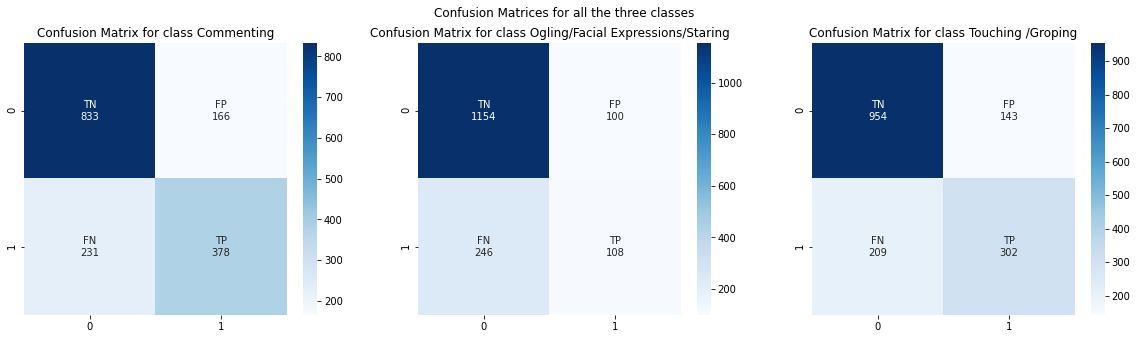

In [ ]:
clf = MultiOutputClassifier(KNeighborsClassifier())

param_grid={
    'estimator__n_neighbors':[3,5,7,10,15],
    'estimator__weights':['distance','uniform']
}
grid_clf_knn = GridSearchCV(clf,param_grid,scoring='f1_macro',n_jobs=-1)
grid_clf_knn.fit(pd.concat([X_train_final_2,X_cv_final_2]),pd.concat([y_train,y_cv]))

print('Best params : ',grid_clf_knn.best_params_)

clf_knn = grid_clf_knn.best_estimator_
predictions = clf_knn.predict (X_test_final_2)

hamming_loss,emr,hamming_score,f1_micro,f1_macro=get_metrics(predictions)
results.loc[len(results.index)]=['K-NN','Glove',f1_macro]

print("Exact match ratio : {:.4f}".format(emr))
print("Hamming score : {:.4f}".format(hamming_score))
print("Micro F1-score : {:.4f}".format(f1_micro))
print("Macro F1-score : {:.4f}".format(f1_macro))
print('')
cf_matrix=multilabel_confusion_matrix(y_test, predictions)
print_cf_matrix(cf_matrix)

Best params :  {'estimator__n_neighbors': 3, 'estimator__weights': 'distance'}
Exact match ratio : 0.4285
Hamming score : 0.7247
Micro F1-score : 0.5202
Macro F1-score : 0.4963



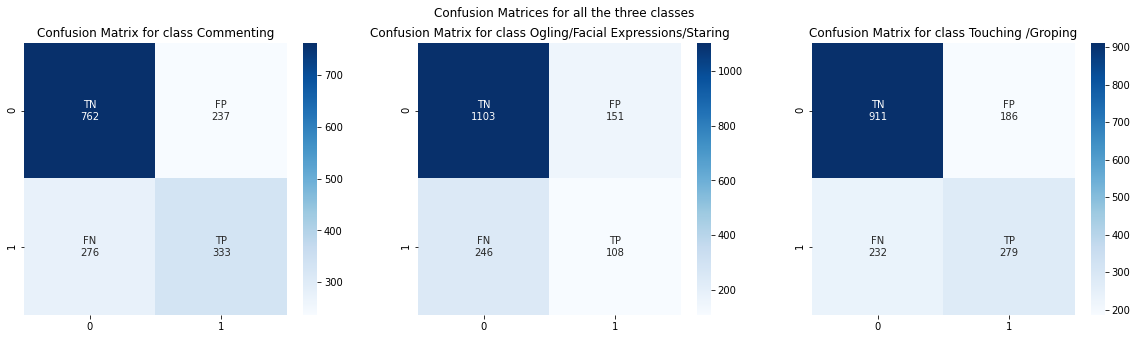

In [ ]:
clf = MultiOutputClassifier(KNeighborsClassifier())

param_grid={
    'estimator__n_neighbors':[3,5,7,10,15],
    'estimator__weights':['distance','uniform']
}
grid_clf_knn = GridSearchCV(clf,param_grid,scoring='f1_macro',n_jobs=-1)
grid_clf_knn.fit(pd.concat([X_train_final_3,X_cv_final_3]),pd.concat([y_train,y_cv]))

print('Best params : ',grid_clf_knn.best_params_)

clf_knn = grid_clf_knn.best_estimator_
predictions = clf_knn.predict (X_test_final_3)

hamming_loss,emr,hamming_score,f1_micro,f1_macro=get_metrics(predictions)
results.loc[len(results.index)]=['K-NN','Glove-tfidf',f1_macro]

print("Exact match ratio : {:.4f}".format(emr))
print("Hamming score : {:.4f}".format(hamming_score))
print("Micro F1-score : {:.4f}".format(f1_micro))
print("Macro F1-score : {:.4f}".format(f1_macro))
print('')
cf_matrix=multilabel_confusion_matrix(y_test, predictions)
print_cf_matrix(cf_matrix)

##<h2><strong>Using Logistic regression</strong><h2>

Best params :  {'estimator__alpha': 1e-05, 'estimator__penalty': 'l1'}
Exact match ratio : 0.5037
Hamming score : 0.7801
Micro F1-score : 0.6392
Macro F1-score : 0.6250



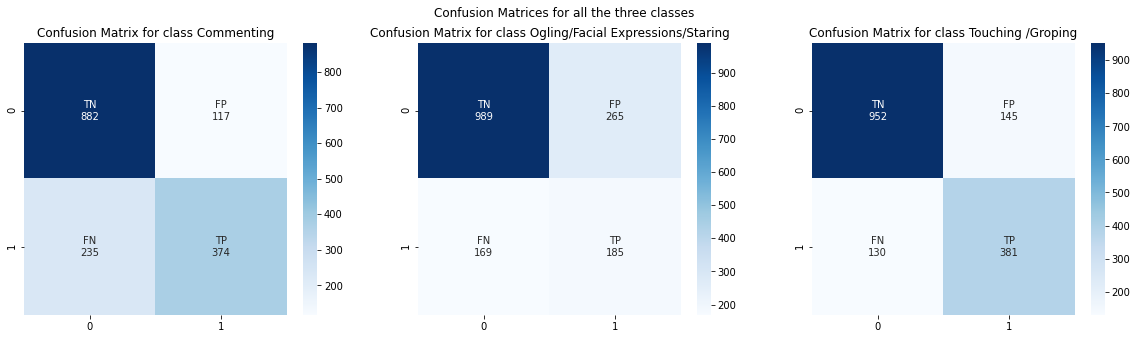

In [ ]:
clf = MultiOutputClassifier(SGDClassifier(loss='log',random_state=25,class_weight='balanced'))

param_grid={
    'estimator__alpha':[0.1,0.01,0.001,0.0001,0.00001,1e-06],
    'estimator__penalty':['l1','l2'] 
}
grid_clf_lr = GridSearchCV(clf,param_grid,scoring='f1_macro',cv=5,n_jobs=-1)
grid_clf_lr.fit(pd.concat([X_train_final,X_cv_final]),pd.concat([y_train,y_cv]))

print('Best params : ',grid_clf_lr.best_params_)

clf_lr = grid_clf_lr.best_estimator_
predictions = clf_lr.predict (X_test_final)

hamming_loss,emr,hamming_score,f1_micro,f1_macro=get_metrics(predictions)
results.loc[len(results.index)]=['Logistic Regression','Fasttext',f1_macro]

print("Exact match ratio : {:.4f}".format(emr))
print("Hamming score : {:.4f}".format(hamming_score))
print("Micro F1-score : {:.4f}".format(f1_micro))
print("Macro F1-score : {:.4f}".format(f1_macro))
print('')
cf_matrix=multilabel_confusion_matrix(y_test, predictions)
print_cf_matrix(cf_matrix)

Best params :  {'estimator__alpha': 1e-05, 'estimator__penalty': 'l1'}
Exact match ratio : 0.4484
Hamming score : 0.7527
Micro F1-score : 0.5913
Macro F1-score : 0.5834



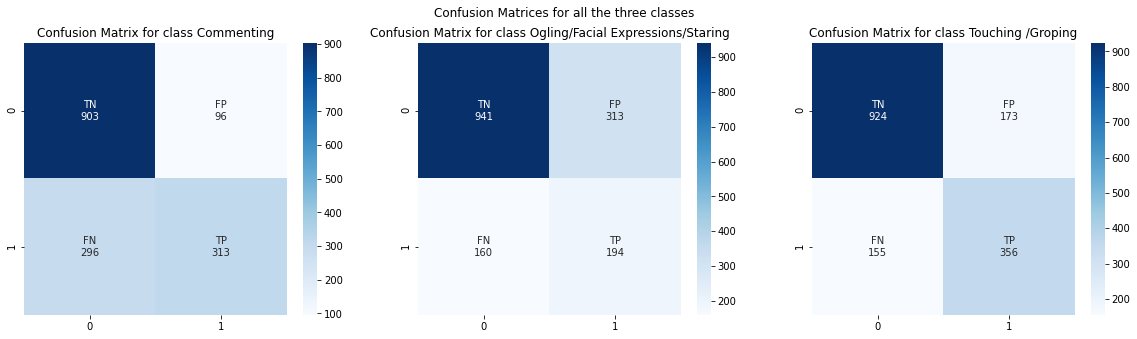

In [ ]:
clf = MultiOutputClassifier(SGDClassifier(loss='log',random_state=25,class_weight='balanced'))

param_grid={
    'estimator__alpha':[0.1,0.01,0.001,0.0001,0.00001,1e-06],
    'estimator__penalty':['l1','l2'] 
}
grid_clf_lr = GridSearchCV(clf,param_grid,scoring='f1_macro',cv=5,n_jobs=-1)
grid_clf_lr.fit(pd.concat([X_train_final_1,X_cv_final_1]),pd.concat([y_train,y_cv]))

print('Best params : ',grid_clf_lr.best_params_)

clf_lr = grid_clf_lr.best_estimator_
predictions = clf_lr.predict (X_test_final_1)

hamming_loss,emr,hamming_score,f1_micro,f1_macro=get_metrics(predictions)
results.loc[len(results.index)]=['Logistic Regression','Fasttext-tfidf',f1_macro]

print("Exact match ratio : {:.4f}".format(emr))
print("Hamming score : {:.4f}".format(hamming_score))
print("Micro F1-score : {:.4f}".format(f1_micro))
print("Macro F1-score : {:.4f}".format(f1_macro))
print('')
cf_matrix=multilabel_confusion_matrix(y_test, predictions)
print_cf_matrix(cf_matrix)

Best params :  {'estimator__alpha': 0.001, 'estimator__penalty': 'l2'}
Exact match ratio : 0.4900
Hamming score : 0.7720
Micro F1-score : 0.6370
Macro F1-score : 0.6289



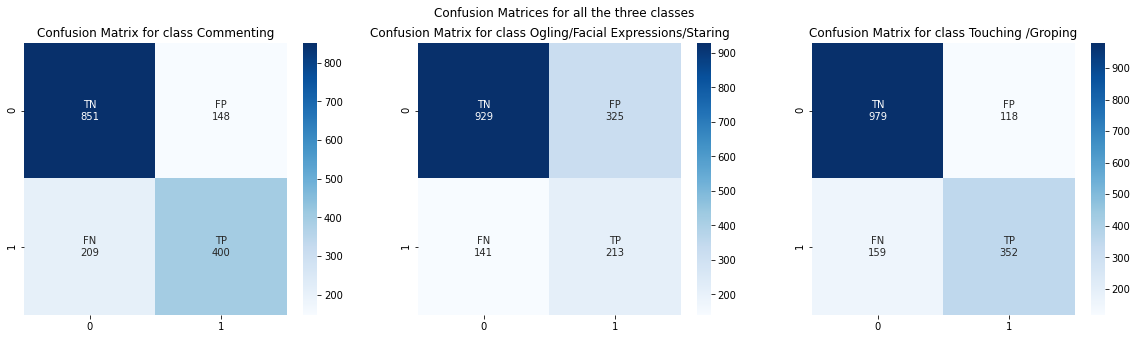

In [ ]:
clf = MultiOutputClassifier(SGDClassifier(loss='log',random_state=25,class_weight='balanced'))

param_grid={
    'estimator__alpha':[0.1,0.01,0.001,0.0001,0.00001,1e-06],
    'estimator__penalty':['l1','l2'] 
}
grid_clf_lr = GridSearchCV(clf,param_grid,scoring='f1_macro',cv=5,n_jobs=-1)
grid_clf_lr.fit(pd.concat([X_train_final_2,X_cv_final_2]),pd.concat([y_train,y_cv]))

print('Best params : ',grid_clf_lr.best_params_)

clf_lr = grid_clf_lr.best_estimator_
predictions = clf_lr.predict (X_test_final_2)

hamming_loss,emr,hamming_score,f1_micro,f1_macro=get_metrics(predictions)
results.loc[len(results.index)]=['Logistic Regression','Glove',f1_macro]

print("Exact match ratio : {:.4f}".format(emr))
print("Hamming score : {:.4f}".format(hamming_score))
print("Micro F1-score : {:.4f}".format(f1_micro))
print("Macro F1-score : {:.4f}".format(f1_macro))
print('')
cf_matrix=multilabel_confusion_matrix(y_test, predictions)
print_cf_matrix(cf_matrix)

Best params :  {'estimator__alpha': 0.001, 'estimator__penalty': 'l2'}
Exact match ratio : 0.4465
Hamming score : 0.7452
Micro F1-score : 0.6100
Macro F1-score : 0.6019



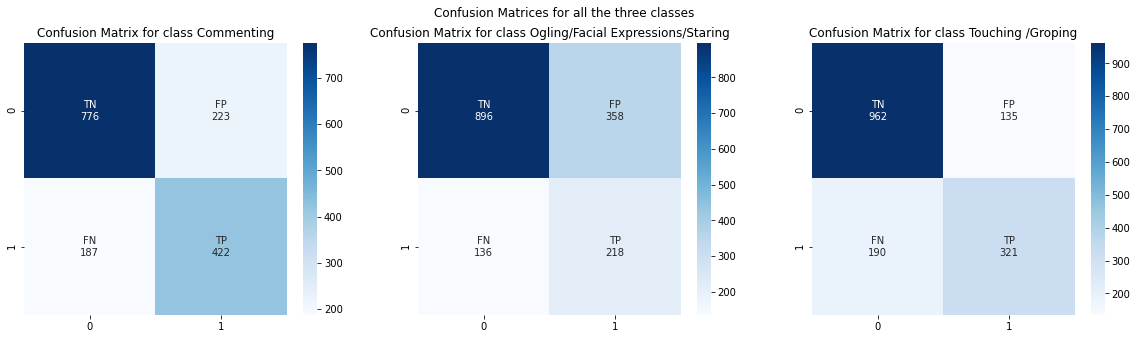

In [ ]:
clf = MultiOutputClassifier(SGDClassifier(loss='log',random_state=25,class_weight='balanced'))

param_grid={
    'estimator__alpha':[0.1,0.01,0.001,0.0001,0.00001,1e-06],
    'estimator__penalty':['l1','l2'] 
}
grid_clf_lr = GridSearchCV(clf,param_grid,scoring='f1_macro',cv=5,n_jobs=-1)
grid_clf_lr.fit(pd.concat([X_train_final_3,X_cv_final_3]),pd.concat([y_train,y_cv]))

print('Best params : ',grid_clf_lr.best_params_)

clf_lr = grid_clf_lr.best_estimator_
predictions = clf_lr.predict (X_test_final_3)

hamming_loss,emr,hamming_score,f1_micro,f1_macro=get_metrics(predictions)
results.loc[len(results.index)]=['Logistic Regression','Glove-tfidf',f1_macro]

print("Exact match ratio : {:.4f}".format(emr))
print("Hamming score : {:.4f}".format(hamming_score))
print("Micro F1-score : {:.4f}".format(f1_micro))
print("Macro F1-score : {:.4f}".format(f1_macro))
print('')
cf_matrix=multilabel_confusion_matrix(y_test, predictions)
print_cf_matrix(cf_matrix)

##<h2><strong>Using Support Vector Machines</strong><h2>

Best params :  {'estimator__alpha': 0.0001, 'estimator__penalty': 'l1'}
Exact match ratio : 0.4428
Hamming score : 0.7504
Micro F1-score : 0.6219
Macro F1-score : 0.6160



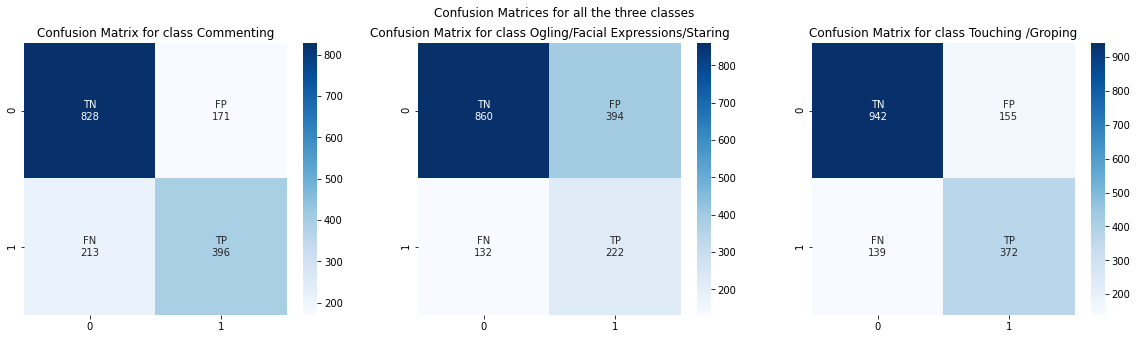

In [ ]:
clf = MultiOutputClassifier(SGDClassifier(loss='hinge',random_state=25,class_weight='balanced'))

param_grid={
    'estimator__alpha':[0.1,0.01,0.001,0.0001,0.00001,1e-06],
    'estimator__penalty':['l1','l2'] 
}
grid_clf_svm = GridSearchCV(clf,param_grid,scoring='f1_macro',cv=5,n_jobs=-1)
grid_clf_svm.fit(pd.concat([X_train_final,X_cv_final]),pd.concat([y_train,y_cv]))

print('Best params : ',grid_clf_svm.best_params_)

clf_svm = grid_clf_svm.best_estimator_
predictions = clf_svm.predict (X_test_final)

hamming_loss,emr,hamming_score,f1_micro,f1_macro=get_metrics(predictions)
results.loc[len(results.index)]=['SVM','Fasttext',f1_macro]

print("Exact match ratio : {:.4f}".format(emr))
print("Hamming score : {:.4f}".format(hamming_score))
print("Micro F1-score : {:.4f}".format(f1_micro))
print("Macro F1-score : {:.4f}".format(f1_macro))
print('')
cf_matrix=multilabel_confusion_matrix(y_test, predictions)
print_cf_matrix(cf_matrix)

Best params :  {'estimator__alpha': 1e-05, 'estimator__penalty': 'l1'}
Exact match ratio : 0.3993
Hamming score : 0.7284
Micro F1-score : 0.5982
Macro F1-score : 0.5973



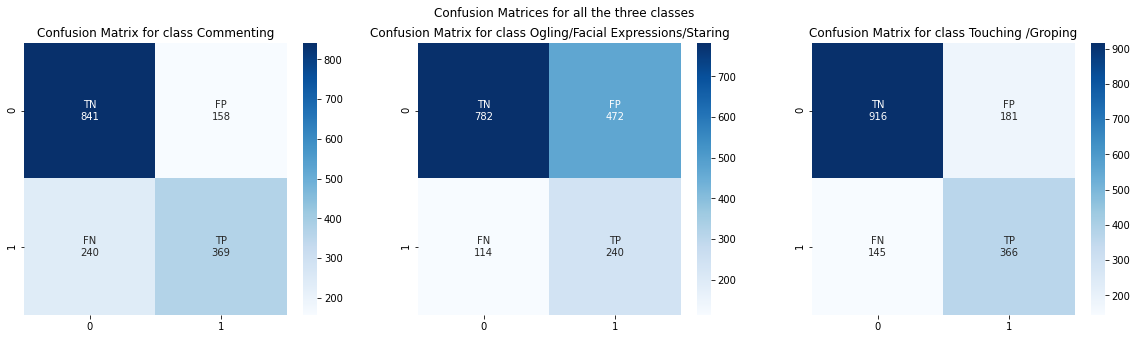

In [ ]:
clf = MultiOutputClassifier(SGDClassifier(loss='hinge',random_state=25,class_weight='balanced'))

param_grid={
    'estimator__alpha':[0.1,0.01,0.001,0.0001,0.00001,1e-06],
    'estimator__penalty':['l1','l2'] 
}
grid_clf_svm = GridSearchCV(clf,param_grid,scoring='f1_macro',cv=5,n_jobs=-1)
grid_clf_svm.fit(pd.concat([X_train_final_1,X_cv_final_1]),pd.concat([y_train,y_cv]))

print('Best params : ',grid_clf_svm.best_params_)

clf_svm = grid_clf_svm.best_estimator_
predictions = clf_svm.predict (X_test_final_1)

hamming_loss,emr,hamming_score,f1_micro,f1_macro=get_metrics(predictions)
results.loc[len(results.index)]=['SVM','Fasttext-tfidf',f1_macro]

print("Exact match ratio : {:.4f}".format(emr))
print("Hamming score : {:.4f}".format(hamming_score))
print("Micro F1-score : {:.4f}".format(f1_micro))
print("Macro F1-score : {:.4f}".format(f1_macro))
print('')
cf_matrix=multilabel_confusion_matrix(y_test, predictions)
print_cf_matrix(cf_matrix)

Best params :  {'estimator__alpha': 0.001, 'estimator__penalty': 'l2'}
Exact match ratio : 0.5006
Hamming score : 0.7724
Micro F1-score : 0.6481
Macro F1-score : 0.6317



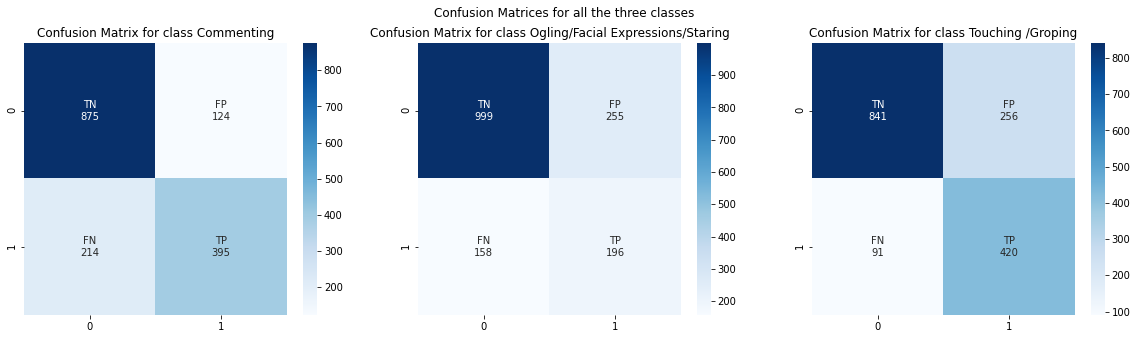

In [ ]:
clf = MultiOutputClassifier(SGDClassifier(loss='hinge',random_state=25,class_weight='balanced'))

param_grid={
    'estimator__alpha':[0.1,0.01,0.001,0.0001,0.00001,1e-06],
    'estimator__penalty':['l1','l2'] 
}
grid_clf_svm = GridSearchCV(clf,param_grid,scoring='f1_macro',cv=5,n_jobs=-1)
grid_clf_svm.fit(pd.concat([X_train_final_2,X_cv_final_2]),pd.concat([y_train,y_cv]))

print('Best params : ',grid_clf_svm.best_params_)

clf_svm = grid_clf_svm.best_estimator_
predictions = clf_svm.predict (X_test_final_2)

hamming_loss,emr,hamming_score,f1_micro,f1_macro=get_metrics(predictions)
results.loc[len(results.index)]=['SVM','Glove',f1_macro]

print("Exact match ratio : {:.4f}".format(emr))
print("Hamming score : {:.4f}".format(hamming_score))
print("Micro F1-score : {:.4f}".format(f1_micro))
print("Macro F1-score : {:.4f}".format(f1_macro))
print('')
cf_matrix=multilabel_confusion_matrix(y_test, predictions)
print_cf_matrix(cf_matrix)

Best params :  {'estimator__alpha': 0.001, 'estimator__penalty': 'l2'}
Exact match ratio : 0.4919
Hamming score : 0.7720
Micro F1-score : 0.6091
Macro F1-score : 0.5965



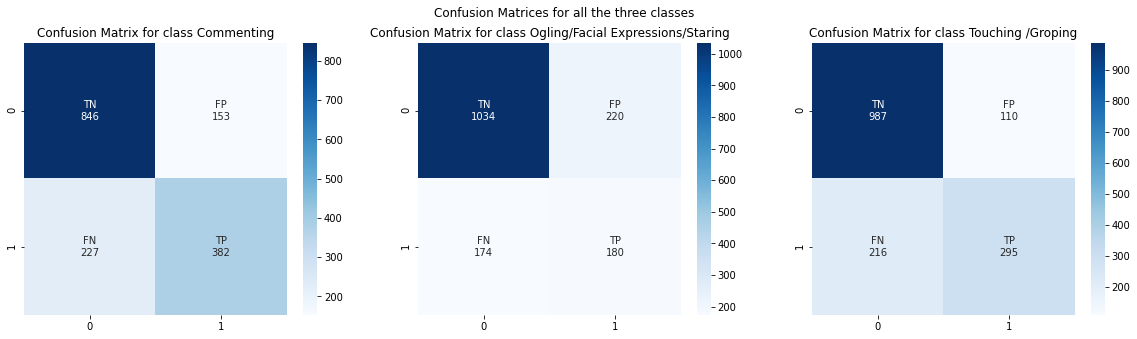

In [ ]:
clf = MultiOutputClassifier(SGDClassifier(loss='hinge',random_state=25,class_weight='balanced'))

param_grid={
    'estimator__alpha':[0.1,0.01,0.001,0.0001,0.00001,1e-06],
    'estimator__penalty':['l1','l2'] 
}
grid_clf_svm = GridSearchCV(clf,param_grid,scoring='f1_macro',cv=5,n_jobs=-1)
grid_clf_svm.fit(pd.concat([X_train_final_3,X_cv_final_3]),pd.concat([y_train,y_cv]))

print('Best params : ',grid_clf_svm.best_params_)

clf_svm = grid_clf_svm.best_estimator_
predictions = clf_svm.predict (X_test_final_3)

hamming_loss,emr,hamming_score,f1_micro,f1_macro=get_metrics(predictions)
results.loc[len(results.index)]=['SVM','Glove-tfidf',f1_macro]

print("Exact match ratio : {:.4f}".format(emr))
print("Hamming score : {:.4f}".format(hamming_score))
print("Micro F1-score : {:.4f}".format(f1_micro))
print("Macro F1-score : {:.4f}".format(f1_macro))
print('')
cf_matrix=multilabel_confusion_matrix(y_test, predictions)
print_cf_matrix(cf_matrix)

##<h2><strong>Using Random Forest Classifier</strong><h2>

Best params :  {'estimator__max_depth': 5, 'estimator__n_estimators': 300}
Exact match ratio : 0.4664
Hamming score : 0.7645
Micro F1-score : 0.6157
Macro F1-score : 0.6024



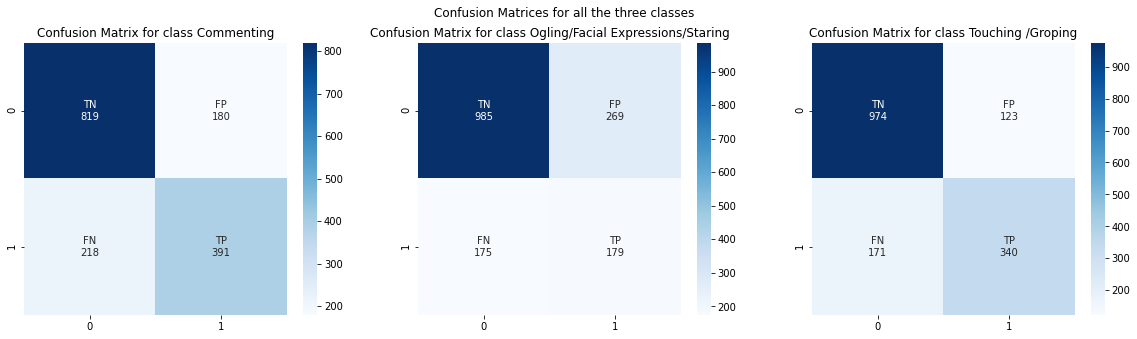

In [ ]:
clf = MultiOutputClassifier(RandomForestClassifier(random_state=25,class_weight='balanced'))

param_grid={
    'estimator__max_depth':[5,10,15],
    'estimator__n_estimators':[50,100,150,200,300]
}
grid_clf_rf = GridSearchCV(clf,param_grid,scoring='f1_macro',cv=5,n_jobs=-1)
grid_clf_rf.fit(pd.concat([X_train_final,X_cv_final]),pd.concat([y_train,y_cv]))

print('Best params : ',grid_clf_rf.best_params_)

clf_rf = grid_clf_rf.best_estimator_
predictions = clf_rf.predict (X_test_final)

hamming_loss,emr,hamming_score,f1_micro,f1_macro=get_metrics(predictions)
results.loc[len(results.index)]=['Random Forest','Fasttext',f1_macro]

print("Exact match ratio : {:.4f}".format(emr))
print("Hamming score : {:.4f}".format(hamming_score))
print("Micro F1-score : {:.4f}".format(f1_micro))
print("Macro F1-score : {:.4f}".format(f1_macro))
print('')
cf_matrix=multilabel_confusion_matrix(y_test, predictions)
print_cf_matrix(cf_matrix)

Best params :  {'estimator__max_depth': 5, 'estimator__n_estimators': 300}
Exact match ratio : 0.4303
Hamming score : 0.7465
Micro F1-score : 0.5810
Macro F1-score : 0.5696



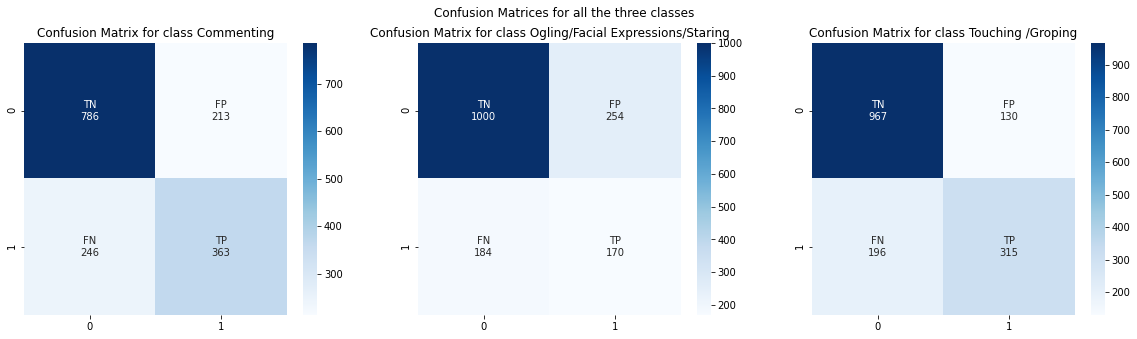

In [ ]:
clf = MultiOutputClassifier(RandomForestClassifier(random_state=25,class_weight='balanced'))

param_grid={
    'estimator__max_depth':[5,10,15],
    'estimator__n_estimators':[50,100,150,200,300]
}
grid_clf_rf = GridSearchCV(clf,param_grid,scoring='f1_macro',cv=5,n_jobs=-1)
grid_clf_rf.fit(pd.concat([X_train_final_1,X_cv_final_1]),pd.concat([y_train,y_cv]))

print('Best params : ',grid_clf_rf.best_params_)

clf_rf = grid_clf_rf.best_estimator_
predictions = clf_rf.predict (X_test_final_1)

hamming_loss,emr,hamming_score,f1_micro,f1_macro=get_metrics(predictions)
results.loc[len(results.index)]=['Random Forest','Fasttext-tfidf',f1_macro]

print("Exact match ratio : {:.4f}".format(emr))
print("Hamming score : {:.4f}".format(hamming_score))
print("Micro F1-score : {:.4f}".format(f1_micro))
print("Macro F1-score : {:.4f}".format(f1_macro))
print('')
cf_matrix=multilabel_confusion_matrix(y_test, predictions)
print_cf_matrix(cf_matrix)

Best params :  {'estimator__max_depth': 5, 'estimator__n_estimators': 300}
Exact match ratio : 0.5137
Hamming score : 0.7801
Micro F1-score : 0.6284
Macro F1-score : 0.6123



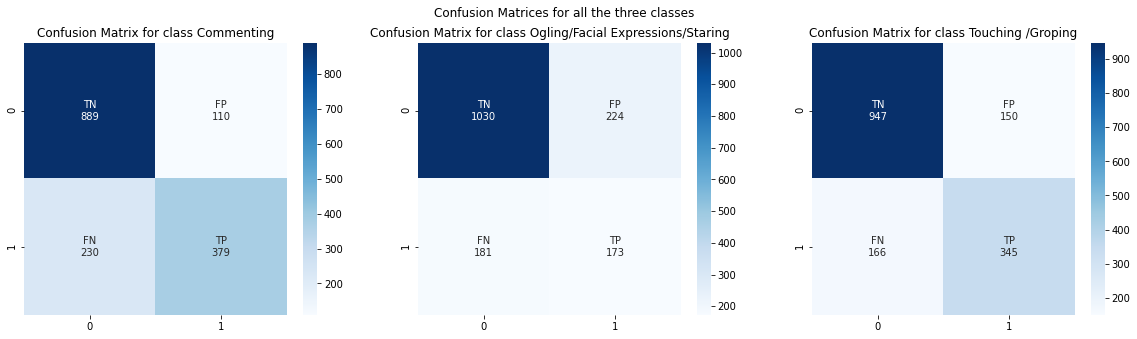

In [ ]:
clf = MultiOutputClassifier(RandomForestClassifier(random_state=25,class_weight='balanced'))

param_grid={
    'estimator__max_depth':[5,10,15],
    'estimator__n_estimators':[50,100,150,200,300]
}
grid_clf_rf = GridSearchCV(clf,param_grid,scoring='f1_macro',cv=5,n_jobs=-1)
grid_clf_rf.fit(pd.concat([X_train_final_2,X_cv_final_2]),pd.concat([y_train,y_cv]))

print('Best params : ',grid_clf_rf.best_params_)

clf_rf = grid_clf_rf.best_estimator_
predictions = clf_rf.predict (X_test_final_2)

hamming_loss,emr,hamming_score,f1_micro,f1_macro=get_metrics(predictions)
results.loc[len(results.index)]=['Random Forest','Glove',f1_macro]

print("Exact match ratio : {:.4f}".format(emr))
print("Hamming score : {:.4f}".format(hamming_score))
print("Micro F1-score : {:.4f}".format(f1_micro))
print("Macro F1-score : {:.4f}".format(f1_macro))
print('')
cf_matrix=multilabel_confusion_matrix(y_test, predictions)
print_cf_matrix(cf_matrix)

Best params :  {'estimator__max_depth': 5, 'estimator__n_estimators': 300}
Exact match ratio : 0.4621
Hamming score : 0.7581
Micro F1-score : 0.5915
Macro F1-score : 0.5767



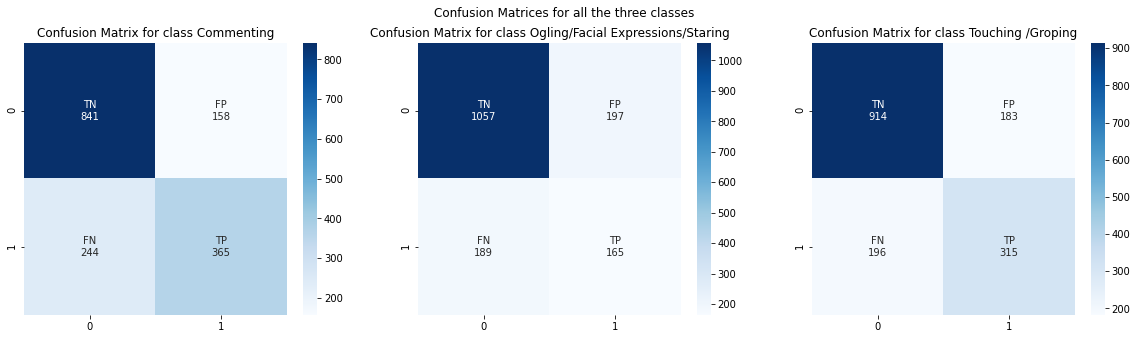

In [ ]:
clf = MultiOutputClassifier(RandomForestClassifier(random_state=25,class_weight='balanced'))

param_grid={
    'estimator__max_depth':[5,10,15],
    'estimator__n_estimators':[50,100,150,200,300]
}
grid_clf_rf = GridSearchCV(clf,param_grid,scoring='f1_macro',cv=5,n_jobs=-1)
grid_clf_rf.fit(pd.concat([X_train_final_3,X_cv_final_3]),pd.concat([y_train,y_cv]))

print('Best params : ',grid_clf_rf.best_params_)

clf_rf = grid_clf_rf.best_estimator_
predictions = clf_rf.predict (X_test_final_3)

hamming_loss,emr,hamming_score,f1_micro,f1_macro=get_metrics(predictions)
results.loc[len(results.index)]=['Random Forest','Glove-tfidf',f1_macro]

print("Exact match ratio : {:.4f}".format(emr))
print("Hamming score : {:.4f}".format(hamming_score))
print("Micro F1-score : {:.4f}".format(f1_micro))
print("Macro F1-score : {:.4f}".format(f1_macro))
print('')
cf_matrix=multilabel_confusion_matrix(y_test, predictions)
print_cf_matrix(cf_matrix)

##<h2><strong>Using Classifier Chains</strong><h2>

Order of the best Chain is :  [2 1 0]
Exact match ratio : 0.4185
Hamming score : 0.7316
Micro F1-score : 0.5997
Macro F1-score : 0.5998



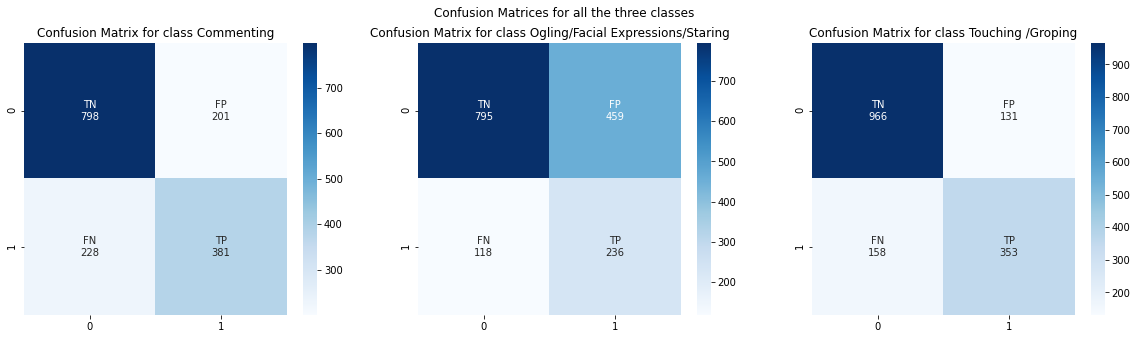

In [ ]:
base_svm=SGDClassifier(loss='hinge',alpha=0.0001,penalty='l1',random_state=25,class_weight='balanced')

chain_clfs = [ClassifierChain(base_svm, order='random', random_state=i) for i in range(10)]
for chain in chain_clfs:
    chain.fit(X_train_final, y_train)

y_pred_chains = np.array([chain.predict(X_cv_final) for chain in chain_clfs])

scores=[]
for predictions in y_pred_chains:
  scores.append(metrics.f1_score(y_cv,predictions,average='macro'))

best_chain=chain_clfs[np.argmax(scores)]

print('Order of the best Chain is : ',best_chain.order_)

best_chain_clf=ClassifierChain(base_svm,order=best_chain.order_)
best_chain_clf.fit(X_train_final,y_train)
predictions=best_chain_clf.predict(X_test_final)

hamming_loss,emr,hamming_score,f1_micro,f1_macro=get_metrics(predictions)
results.loc[len(results.index)]=['Classifier Chain','Fasttext',f1_macro]

print("Exact match ratio : {:.4f}".format(emr))
print("Hamming score : {:.4f}".format(hamming_score))
print("Micro F1-score : {:.4f}".format(f1_micro))
print("Macro F1-score : {:.4f}".format(f1_macro))
print('')
cf_matrix=multilabel_confusion_matrix(y_test, predictions)
print_cf_matrix(cf_matrix)

Order of the best Chain is :  [1 0 2]
Exact match ratio : 0.4366
Hamming score : 0.7488
Micro F1-score : 0.6217
Macro F1-score : 0.6010



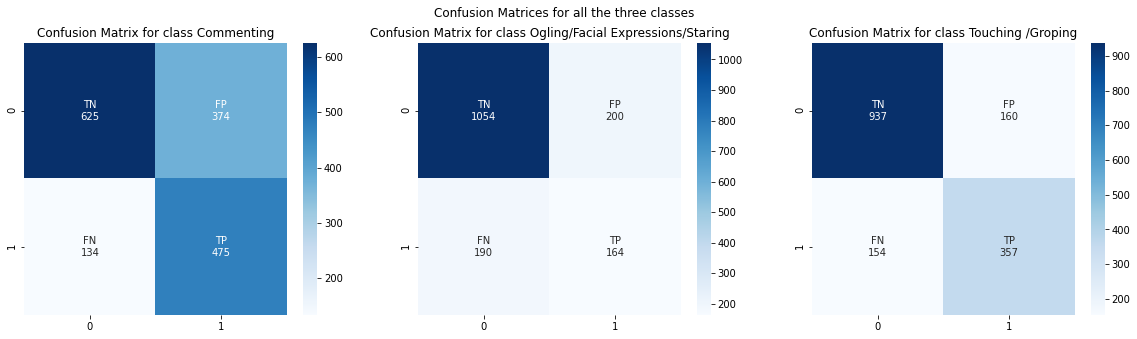

In [ ]:
base_svm=SGDClassifier(loss='hinge',alpha=1e-05,penalty='l1',random_state=25,class_weight='balanced')

chain_clfs = [ClassifierChain(base_svm, order='random', random_state=i) for i in range(10)]
for chain in chain_clfs:
    chain.fit(X_train_final_1, y_train)

y_pred_chains = np.array([chain.predict(X_cv_final_1) for chain in chain_clfs])

scores=[]
for predictions in y_pred_chains:
  scores.append(metrics.f1_score(y_cv,predictions,average='macro'))

best_chain=chain_clfs[np.argmax(scores)]

print('Order of the best Chain is : ',best_chain.order_)

best_chain_clf=ClassifierChain(base_svm,order=best_chain.order_)
best_chain_clf.fit(X_train_final_1,y_train)
predictions=best_chain_clf.predict(X_test_final_1)

hamming_loss,emr,hamming_score,f1_micro,f1_macro=get_metrics(predictions)
results.loc[len(results.index)]=['Classifier Chain','Fasttext-tfidf',f1_macro]

print("Exact match ratio : {:.4f}".format(emr))
print("Hamming score : {:.4f}".format(hamming_score))
print("Micro F1-score : {:.4f}".format(f1_micro))
print("Macro F1-score : {:.4f}".format(f1_macro))
print('')
cf_matrix=multilabel_confusion_matrix(y_test, predictions)
print_cf_matrix(cf_matrix)

Order of the best Chain is :  [0 1 2]
Exact match ratio : 0.5299
Hamming score : 0.7857
Micro F1-score : 0.6267
Macro F1-score : 0.6115



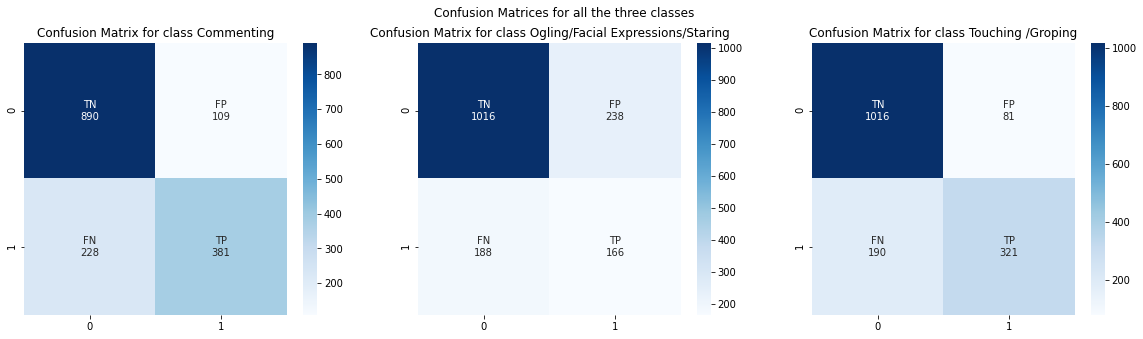

In [ ]:
base_svm=SGDClassifier(loss='hinge',alpha=0.001,penalty='l2',random_state=25,class_weight='balanced')

chain_clfs = [ClassifierChain(base_svm, order='random', random_state=i) for i in range(10)]
for chain in chain_clfs:
    chain.fit(X_train_final_2, y_train)

y_pred_chains = np.array([chain.predict(X_cv_final_2) for chain in chain_clfs])

scores=[]
for predictions in y_pred_chains:
  scores.append(metrics.f1_score(y_cv,predictions,average='macro'))

best_chain=chain_clfs[np.argmax(scores)]

print('Order of the best Chain is : ',best_chain.order_)

best_chain_clf=ClassifierChain(base_svm,order=best_chain.order_)
best_chain_clf.fit(X_train_final_2,y_train)
predictions=best_chain_clf.predict(X_test_final_2)

hamming_loss,emr,hamming_score,f1_micro,f1_macro=get_metrics(predictions)
results.loc[len(results.index)]=['Classifier Chain','Glove',f1_macro]

print("Exact match ratio : {:.4f}".format(emr))
print("Hamming score : {:.4f}".format(hamming_score))
print("Micro F1-score : {:.4f}".format(f1_micro))
print("Macro F1-score : {:.4f}".format(f1_macro))
print('')
cf_matrix=multilabel_confusion_matrix(y_test, predictions)
print_cf_matrix(cf_matrix)

Order of the best Chain is :  [1 0 2]
Exact match ratio : 0.4353
Hamming score : 0.7228
Micro F1-score : 0.6078
Macro F1-score : 0.5987



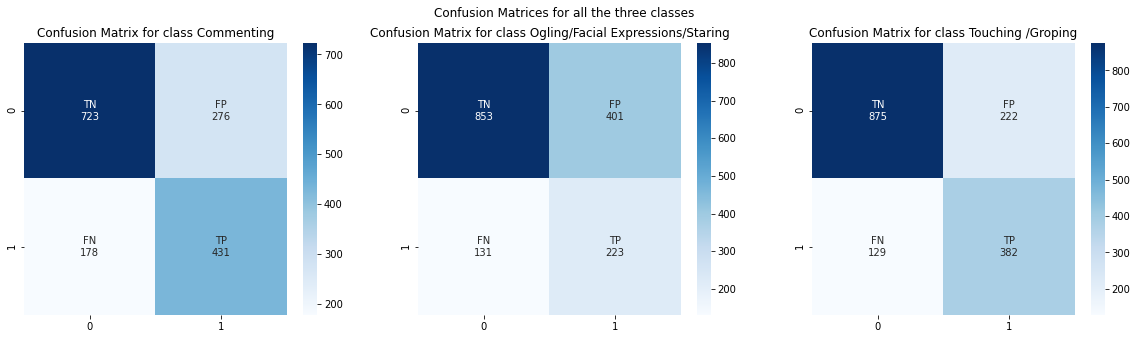

In [ ]:
base_svm=SGDClassifier(loss='hinge',alpha=0.001,penalty='l2',random_state=25,class_weight='balanced')

chain_clfs = [ClassifierChain(base_svm, order='random', random_state=i) for i in range(10)]
for chain in chain_clfs:
    chain.fit(X_train_final_3, y_train)

y_pred_chains = np.array([chain.predict(X_cv_final_3) for chain in chain_clfs])

scores=[]
for predictions in y_pred_chains:
  scores.append(metrics.f1_score(y_cv,predictions,average='macro'))

best_chain=chain_clfs[np.argmax(scores)]

print('Order of the best Chain is : ',best_chain.order_)

best_chain_clf=ClassifierChain(base_svm,order=best_chain.order_)
best_chain_clf.fit(X_train_final_3,y_train)
predictions=best_chain_clf.predict(X_test_final_3)

hamming_loss,emr,hamming_score,f1_micro,f1_macro=get_metrics(predictions)
results.loc[len(results.index)]=['Classifier Chain','Glove-tfidf',f1_macro]

print("Exact match ratio : {:.4f}".format(emr))
print("Hamming score : {:.4f}".format(hamming_score))
print("Micro F1-score : {:.4f}".format(f1_micro))
print("Macro F1-score : {:.4f}".format(f1_macro))
print('')
cf_matrix=multilabel_confusion_matrix(y_test, predictions)
print_cf_matrix(cf_matrix)

##<h2><strong>Using AdaBoost</strong><h2>

Exact match ratio : 0.5044
Hamming score : 0.7792
Micro F1-score : 0.5905
Macro F1-score : 0.5573



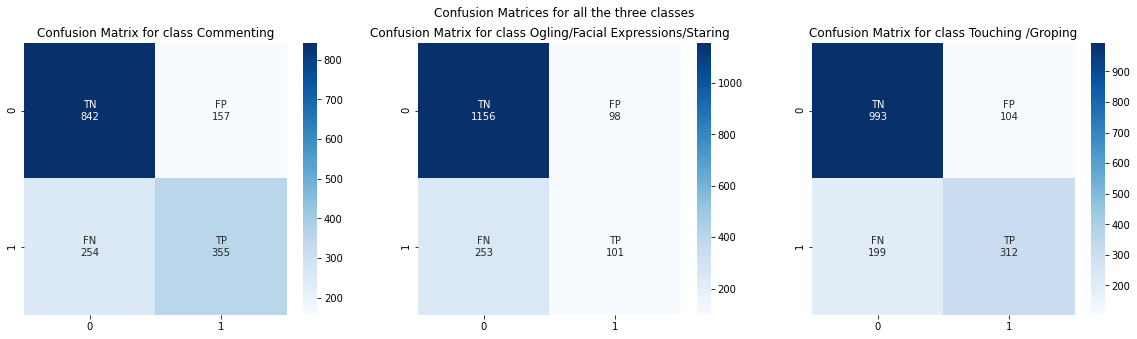

In [ ]:
adaboost_clf=MultiOutputClassifier(AdaBoostClassifier(n_estimators=200,random_state=42))
adaboost_clf.fit(X_train_final,y_train)
predictions = adaboost_clf.predict (X_test_final)

hamming_loss,emr,hamming_score,f1_micro,f1_macro=get_metrics(predictions)
results.loc[len(results.index)]=['Adaboost','Fasttext',f1_macro]

print("Exact match ratio : {:.4f}".format(emr))
print("Hamming score : {:.4f}".format(hamming_score))
print("Micro F1-score : {:.4f}".format(f1_micro))
print("Macro F1-score : {:.4f}".format(f1_macro))
print('')
cf_matrix=multilabel_confusion_matrix(y_test, predictions)
print_cf_matrix(cf_matrix)

Exact match ratio : 0.4677
Hamming score : 0.7587
Micro F1-score : 0.5474
Macro F1-score : 0.5151



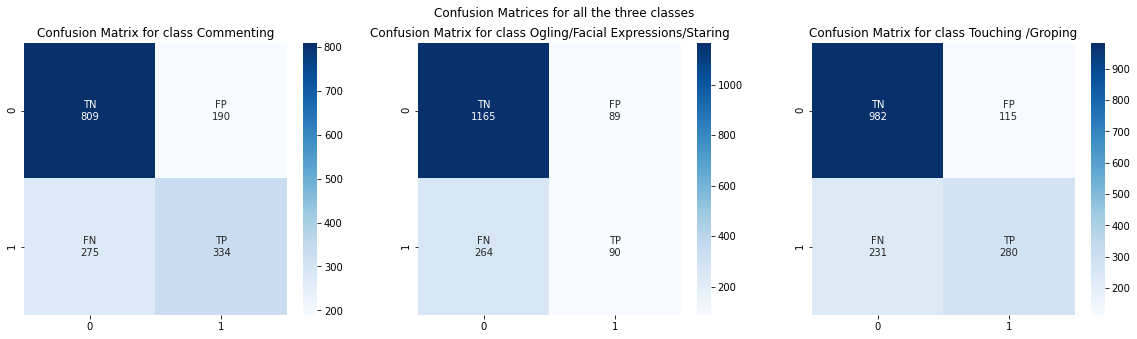

In [ ]:
adaboost_clf=MultiOutputClassifier(AdaBoostClassifier(n_estimators=200,random_state=42))
adaboost_clf.fit(X_train_final_1,y_train)
predictions = adaboost_clf.predict (X_test_final_1)

hamming_loss,emr,hamming_score,f1_micro,f1_macro=get_metrics(predictions)
results.loc[len(results.index)]=['Adaboost','Fasttext-tfidf',f1_macro]

print("Exact match ratio : {:.4f}".format(emr))
print("Hamming score : {:.4f}".format(hamming_score))
print("Micro F1-score : {:.4f}".format(f1_micro))
print("Macro F1-score : {:.4f}".format(f1_macro))
print('')
cf_matrix=multilabel_confusion_matrix(y_test, predictions)
print_cf_matrix(cf_matrix)

Exact match ratio : 0.5180
Hamming score : 0.7842
Micro F1-score : 0.6061
Macro F1-score : 0.5769



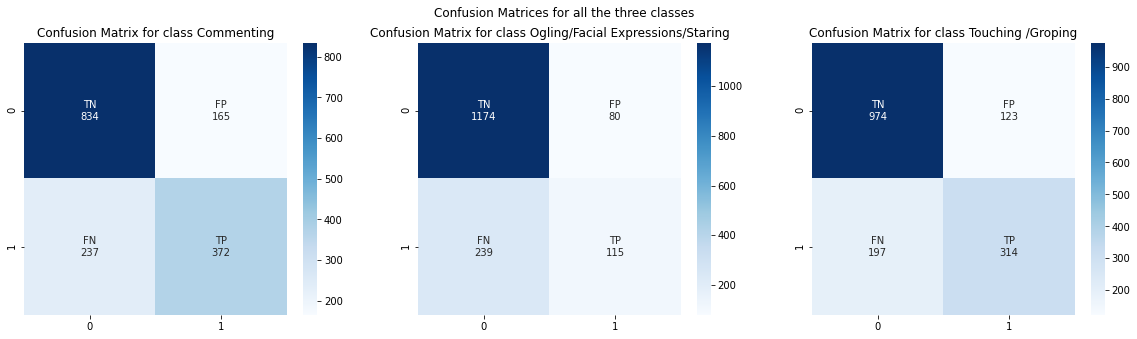

In [ ]:
adaboost_clf=MultiOutputClassifier(AdaBoostClassifier(n_estimators=200,random_state=42))
adaboost_clf.fit(X_train_final_2,y_train)
predictions = adaboost_clf.predict (X_test_final_2)

hamming_loss,emr,hamming_score,f1_micro,f1_macro=get_metrics(predictions)
results.loc[len(results.index)]=['Adaboost','Glove',f1_macro]

print("Exact match ratio : {:.4f}".format(emr))
print("Hamming score : {:.4f}".format(hamming_score))
print("Micro F1-score : {:.4f}".format(f1_micro))
print("Macro F1-score : {:.4f}".format(f1_macro))
print('')
cf_matrix=multilabel_confusion_matrix(y_test, predictions)
print_cf_matrix(cf_matrix)

Exact match ratio : 0.4751
Hamming score : 0.7591
Micro F1-score : 0.5595
Macro F1-score : 0.5338



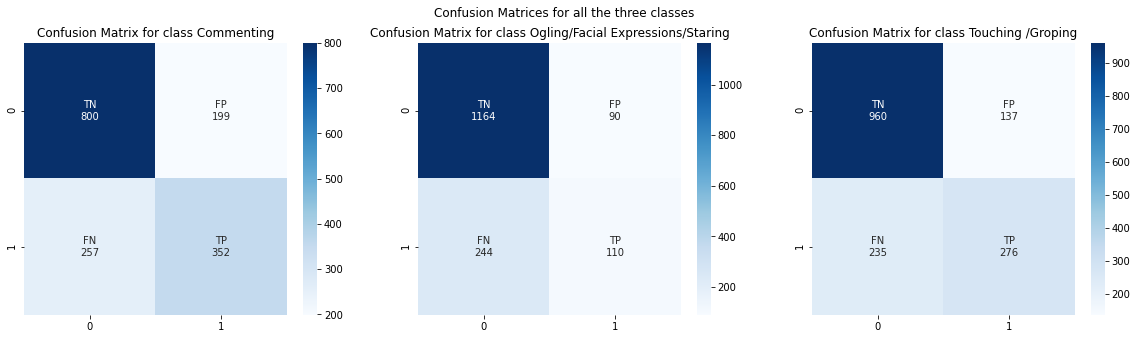

In [ ]:
adaboost_clf=MultiOutputClassifier(AdaBoostClassifier(n_estimators=200,random_state=42))
adaboost_clf.fit(X_train_final_3,y_train)
predictions = adaboost_clf.predict (X_test_final_3)

hamming_loss,emr,hamming_score,f1_micro,f1_macro=get_metrics(predictions)
results.loc[len(results.index)]=['Adaboost','Glove-tfidf',f1_macro]

print("Exact match ratio : {:.4f}".format(emr))
print("Hamming score : {:.4f}".format(hamming_score))
print("Micro F1-score : {:.4f}".format(f1_micro))
print("Macro F1-score : {:.4f}".format(f1_macro))
print('')
cf_matrix=multilabel_confusion_matrix(y_test, predictions)
print_cf_matrix(cf_matrix)

##<h2><strong>Using LightGBM</strong><h2>

In [ ]:
clf = MultiOutputClassifier(LGBMClassifier(random_state=25,class_weight='balanced'))

param_grid={
    'estimator__max_depth':[3,5, 10],
    'estimator__n_estimators':[100,500,1000]
}
grid_clf_lgb = GridSearchCV(clf,param_grid,scoring='f1_macro',cv=5,n_jobs=-1,verbose=4)
grid_clf_lgb.fit(pd.concat([X_train_final_2,X_cv_final_2]), pd.concat([y_train,y_cv]))

In [ ]:
grid_clf_lgb.best_params_

{'estimator__max_depth': 3, 'estimator__n_estimators': 500}

In [52]:
results=pd.read_csv('results.csv')

In [ ]:
clf_lgb=MultiOutputClassifier(LGBMClassifier(n_estimators=500,max_depth=3,random_state=25,class_weight='balanced'))
clf_lgb.fit(X_train_final_2,y_train)

Exact match ratio : 0.5473
Hamming score : 0.7958
Micro F1-score : 0.6588
Macro F1-score : 0.6395



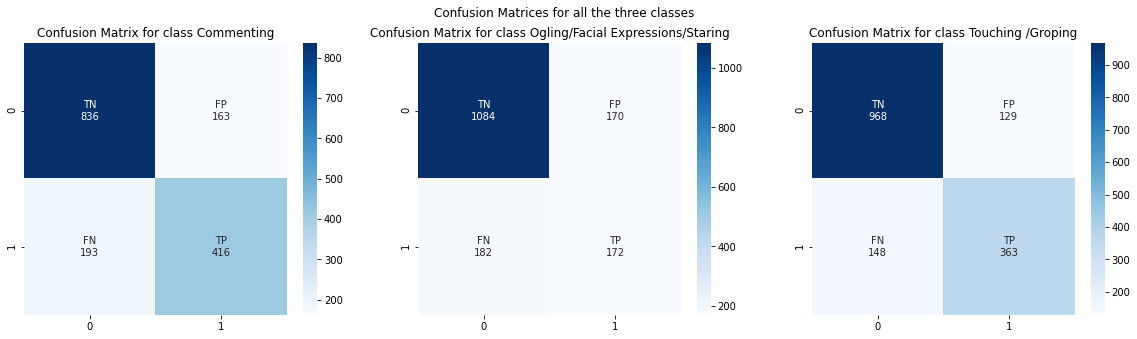

In [59]:
predictions = clf_lgb.predict (X_test_final_2)

hamming_loss,emr,hamming_score,f1_micro,f1_macro=get_metrics(predictions)
results.loc[len(results.index)]=['LightGBM','Glove',f1_macro]

print("Exact match ratio : {:.4f}".format(emr))
print("Hamming score : {:.4f}".format(hamming_score))
print("Micro F1-score : {:.4f}".format(f1_micro))
print("Macro F1-score : {:.4f}".format(f1_macro))
print('')
cf_matrix=multilabel_confusion_matrix(y_test, predictions)
print_cf_matrix(cf_matrix)

##Using Stacking Classifier 

Exact match ratio : 0.5473
Hamming score : 0.7958
Micro F1-score : 0.6588
Macro F1-score : 0.6395



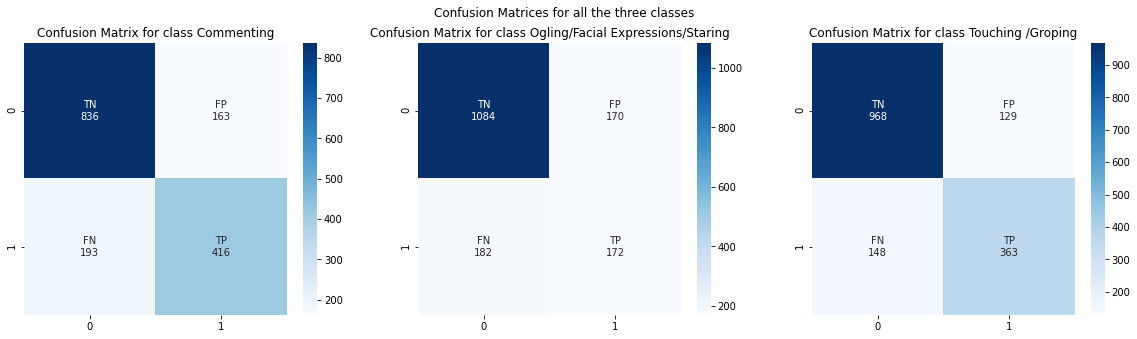

In [65]:
#Using all best models by looking at the previously trained models

clf1=MultiOutputClassifier(SGDClassifier(loss='log',alpha=0.001,penalty='l2',random_state=25,class_weight='balanced'))
clf2=MultiOutputClassifier(SGDClassifier(loss='hinge',alpha=0.001,penalty='l2',random_state=25,class_weight='balanced'))
clf3=MultiOutputClassifier(LGBMClassifier(n_estimators=500,max_depth=3,random_state=25,class_weight='balanced'))

base_svm=SGDClassifier(loss='hinge',alpha=0.001,penalty='l2',random_state=25,class_weight='balanced')
clf4=ClassifierChain(base_svm,order=[0,1,2])

lr = MultiOutputClassifier(LogisticRegression(random_state=25,class_weight='balanced'))

sclf = StackingClassifier(classifiers=[clf1, clf2,clf3,clf4], meta_classifier=lr)
sclf.fit(X_train_final_2,y_train)

predictions = sclf.predict (X_test_final_2)

hamming_loss,emr,hamming_score,f1_micro,f1_macro=get_metrics(predictions)
results.loc[len(results.index)]=['Stacking Classifier','Glove',f1_macro]

print("Exact match ratio : {:.4f}".format(emr))
print("Hamming score : {:.4f}".format(hamming_score))
print("Micro F1-score : {:.4f}".format(f1_micro))
print("Macro F1-score : {:.4f}".format(f1_macro))
print('')
cf_matrix=multilabel_confusion_matrix(y_test, predictions)
print_cf_matrix(cf_matrix)

##Results

In [66]:
print('Models which got above 0.6 F1-macro score : \n')
results[results['F1-Macro']>=0.6]

Models which got above 0.6 F1-macro score : 



,Model,Word Embeddings,F1-Macro
4,Logistic Regression,Fasttext,0.625004
6,Logistic Regression,Glove,0.628886
7,Logistic Regression,Glove-tfidf,0.601924
8,SVM,Fasttext,0.615988
10,SVM,Glove,0.631659
12,Random Forest,Fasttext,0.602416
14,Random Forest,Glove,0.612317
17,Classifier Chain,Fasttext-tfidf,0.600985
18,Classifier Chain,Glove,0.611510
24,LightGBM,Glove,0.639473


We can Observe that Glove model if doing better than other word embeddings

In [67]:
results.to_csv('results.csv',index=False)

In [72]:
def get_vector_representation(query):
  pre_query=preprocess_text(query)
  qd=pd.DataFrame([pre_query],columns=['Description'])
  quer_fasttext=get_embedding_features(qd,glove_word_embeddings,glove_words)
  quer_fasttext=pd.DataFrame(quer_fasttext,columns=['embed_'+str(i) for i in range(300)])
  query_lengths=get_word_char_lengths(qd)
  qeury_sentiments=sentiment_score(qd)

  vector=pd.concat([quer_fasttext,query_lengths,qeury_sentiments],axis=1)

  return vector

In [75]:
def predict(model,query):
  vector=get_vector_representation(query)
  vector.iloc[:,300:]=scaler.transform(vector.iloc[:,300:])
  print(model.predict(vector))

In [76]:
query='he commented and pushed me away'
predict(clf_lgb,query)

[[1 0 0]]


<h1><strong><font color='green'>Deep Learning Models </font></strong></h1>

##DL

In [77]:
#Creating a copies of original data
final_train=train.copy()
final_cv=cv.copy()
final_test=test.copy()

In [78]:
def preprocess_text(text):
  '''This function does all the text preprocessing steps and return a clean text'''
  text=decontracted(text)
  text=remove_special_chars(text)
  return text

In [79]:
#Preprocessing the text data of train,cv and test

final_train['Description']=final_train['Description'].apply(preprocess_text)
final_cv['Description']=final_cv['Description'].apply(preprocess_text)
final_test['Description']=final_test['Description'].apply(preprocess_text)

In [80]:
#Creating input and target data

X_train,y_train=pd.DataFrame(final_train.iloc[:,0]),final_train.iloc[:,1:]
X_cv,y_cv=pd.DataFrame(final_cv.iloc[:,0]),final_cv.iloc[:,1:]
X_test,y_test=pd.DataFrame(final_test.iloc[:,0]),final_test.iloc[:,1:]

In [81]:
print('Shapes of train,cross validate and test data :')
print('X_ train shape : ',X_train.shape,',  y_train shape : ', y_train.shape)
print('X_ cv shape :     ',X_cv.shape, '   ,  y_cv shape : ',y_cv.shape)
print('X_ test shape :  ',X_test.shape, ',  y_test shape : ',y_test.shape)

Shapes of train,cross validate and test data :
X_ train shape :  (6659, 1) ,  y_train shape :  (6659, 3)
X_ cv shape :      (940, 1)    ,  y_cv shape :  (940, 3)
X_ test shape :   (1608, 1) ,  y_test shape :  (1608, 3)


In [82]:
lengths=[]
for index,row in X_train.iterrows():
  lengths.append(len(row['Description'].split()))
lengths=sorted(lengths)

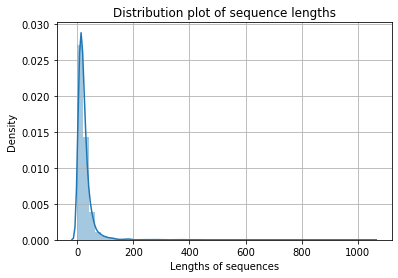

In [83]:
plt.grid()
plt.title('Distribution plot of sequence lengths')
plt.xlabel('Lengths of sequences')
sns.distplot(lengths,hist=True, kde=True)

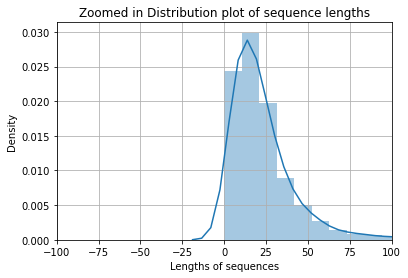

In [84]:
plt.grid()
plt.xlim(-100,100)
plt.xlabel('Lengths of sequences')
plt.title('Zoomed in Distribution plot of sequence lengths')
sns.distplot(lengths,hist=True, kde=True,bins=100)

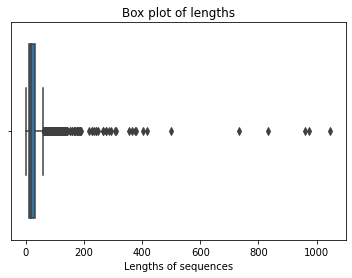

In [85]:
plt.xlabel('Lengths of sequences')
plt.title('Box plot of lengths')
ax = sns.boxplot(x=lengths)

In [86]:
count=0
for i in lengths:
  if i<=150:
    count+=1
print('percentage of lengths that has length less than or equal to 150 :',(count/len(X_train))*100)

percentage of lengths that has length less than or equal to 150 : 99.23411923712268


In [87]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

In [88]:
tokenizer=None

In [89]:
tokenizer=Tokenizer(num_words=8000,filters='!"#$%&()*+,-./:;<=>?@[\\]^`{|}~\t\n',oov_token='UNKNOWN')
tokenizer.fit_on_texts(X_train['Description'])

sequences=tokenizer.texts_to_sequences(X_train['Description'])
padded_text=pad_sequences(sequences,padding="post",truncating="pre",maxlen=150)

sequences_cv=tokenizer.texts_to_sequences(X_cv['Description'])
padded_text_cv=pad_sequences(sequences_cv,padding="post",truncating="pre",maxlen=150)

sequences_test=tokenizer.texts_to_sequences(X_test['Description'])
padded_text_test=pad_sequences(sequences_test,padding="post",truncating="pre",maxlen=150)

In [90]:
vocab_size = len(tokenizer.word_index) + 1
embedding_matrix_fasttext = np.zeros((vocab_size, 300))
for word,index in tokenizer.word_index.items():
  if (word in fasttext_words):
    word_vec=fasttext_word_embeddings.get(word)
    embedding_matrix_fasttext[index]=word_vec

In [91]:
vocab_size = len(tokenizer.word_index) + 1
embedding_matrix_glove = np.zeros((vocab_size, 300))
for word,index in tokenizer.word_index.items():
  if (word in glove_words):
    word_vec=glove_word_embeddings.get(word)
    embedding_matrix_glove[index]=word_vec

In [92]:
inp_length=len(padded_text[0])
print('Length of each sequence :',len(padded_text[0]))
print('Number of sequences in train data : ',len(padded_text))
print('Number of sequences in cv data : ',len(padded_text_cv))
print('Number of sequences in test data : ',len(padded_text_test))

Length of each sequence : 150
Number of sequences in train data :  6659
Number of sequences in cv data :  940
Number of sequences in test data :  1608


In [93]:
from tensorflow.keras.layers import Dense,Input,Conv1D,Activation,Dropout,Flatten,Embedding,Concatenate,MaxPool1D,GlobalMaxPool1D,LSTM,Reshape
from tensorflow.keras.models import Model
import tensorflow as tf
import tensorflow.keras as keras
from keras.callbacks import Callback
from  tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils import class_weight
from keras.callbacks import Callback
import tensorflow.keras.backend as K
from tensorflow.keras.utils import plot_model
from sklearn.metrics import f1_score

In [94]:
def get_f1_score(model,x,y,threshold):
  predicted=model.predict(x)
  target=np.array(y)
  predicted=predicted>threshold
  predicted = predicted.astype(int)
  f1 = f1_score(target,predicted,average='macro') 
  return f1

In [245]:
results=pd.read_csv('results.csv')
results.shape

(26, 3)

In [171]:
class MetricsCustom(Callback):
  '''Creating custom callback metric function to calculate micro f1-score and AUC'''
  def __init__(self, train_data,validation_data,threshold,save_as):
    super(MetricsCustom, self).__init__()
    self.validation_data = validation_data # Validation data is taken from the arguments passed by funtion calling
    self.train_data=train_data
    self.threshold=threshold
    self.save_as=save_as
    self.best_score=0
  def on_train_begin(self,logs={}):
    self.f1_score_val=[]  #Initialising the variables that are used during training
    self.f1_score_train=[]
  def on_epoch_end(self,epoch,logs={}): # At every epoch end this function is called

    train_f1=get_f1_score(self.model,self.train_data[0],self.train_data[1],self.threshold) 
    self.f1_score_train.append(train_f1)

    val_f1=get_f1_score(self.model,self.validation_data[0],self.validation_data[1],self.threshold) 
    self.f1_score_val.append(val_f1)
    if val_f1>self.best_score:
      self.model.save_weights(self.save_as)
      self.best_score=val_f1
    print('  -f1_score : {:.4f}  -val_f1_score : {:.4f} '.format(train_f1,val_f1)) # Printing f1-score and AUC at the end of each epoch

In [164]:
labels=['Commenting', 'Ogling/Facial Expressions/Staring', 'Touching /Groping']
weight_0={}
weight_1={}
for label in labels:
  weights = class_weight.compute_class_weight('balanced',np.unique(y_train[label]),y_train[label])
  weight_0[label]=weights[0]
  weight_1[label]=weights[1]

print(weight_0)
print(weight_1)

{'Commenting': 0.8128662109375, 'Ogling/Facial Expressions/Staring': 0.6331051530709261, 'Touching /Groping': 0.7208270188352457}
{'Commenting': 1.2990635973468592, 'Ogling/Facial Expressions/Staring': 2.378214285714286, 'Touching /Groping': 1.6321078431372549}


In [165]:
def loss_fn(y_true,y_pred):
    loss = 0
    y_true=tf.dtypes.cast(y_true, tf.float32)
    labels=['Commenting', 'Ogling/Facial Expressions/Staring', 'Touching /Groping']
    for index,label in enumerate(labels):
      loss += -(weight_1[label]*y_true[index]*K.log(y_pred[index]) + weight_0[label]*(1-y_true[index])*K.log(1-y_pred[index]))
    return loss

<h2><strong>Using CNN Model
</strong><h2>

In [166]:
def get_model1(embeddings):
  input_layer=Input(shape=(inp_length))
  embedding_layer=Embedding(vocab_size,300,input_length=inp_length)(input_layer) 
  #embedding_layer=Reshape(target_shape=(100,300,1))(embedding_layer)
  x=Conv1D(filters=128,kernel_size=3,kernel_initializer='glorot_normal',activation='tanh')(embedding_layer)
  x=GlobalMaxPool1D()(x)
  y=Conv1D(filters=128,kernel_size=4,kernel_initializer='glorot_normal',activation='tanh')(embedding_layer)
  y=GlobalMaxPool1D()(y)
  z=Conv1D(filters=128,kernel_size=5,kernel_initializer='glorot_normal',activation='tanh')(embedding_layer)
  z=GlobalMaxPool1D()(z)
  conv1d_layer = [x,y,z]
  concatenate=Concatenate(axis=-1)(conv1d_layer) 
  flatten=Flatten()(concatenate)
  drop=Dropout(0.4)(flatten)
  x=Dense(256,activation='relu',kernel_initializer='he_normal')(drop)
  x=Dropout(0.4)(x)
  x=Dense(64,activation='relu',kernel_initializer='he_normal')(x)
  x=Dropout(0.4)(x)
  output=Dense(3,activation='sigmoid')(x) 
  model1=keras.Model(input_layer,output)
  model1.get_layer('embedding').set_weights([embeddings])
  model1.get_layer('embedding').trainable=False

  return model1

In [167]:
tf.keras.backend.clear_session() 
tf.get_logger().setLevel('INFO')
tf.random.set_seed(42)

#Using Fasttext embeddings
fasttext_model1=get_model1(embedding_matrix_fasttext)
fasttext_model1.compile(optimizer=tf.keras.optimizers.Adam(1e-03,clipvalue=0.5),loss=loss_fn)

In [168]:
fasttext_model1.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 150, 300)     2601000     input_1[0][0]                    
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 148, 128)     115328      embedding[0][0]                  
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 147, 128)     153728      embedding[0][0]                  
______________________________________________________________________________________________

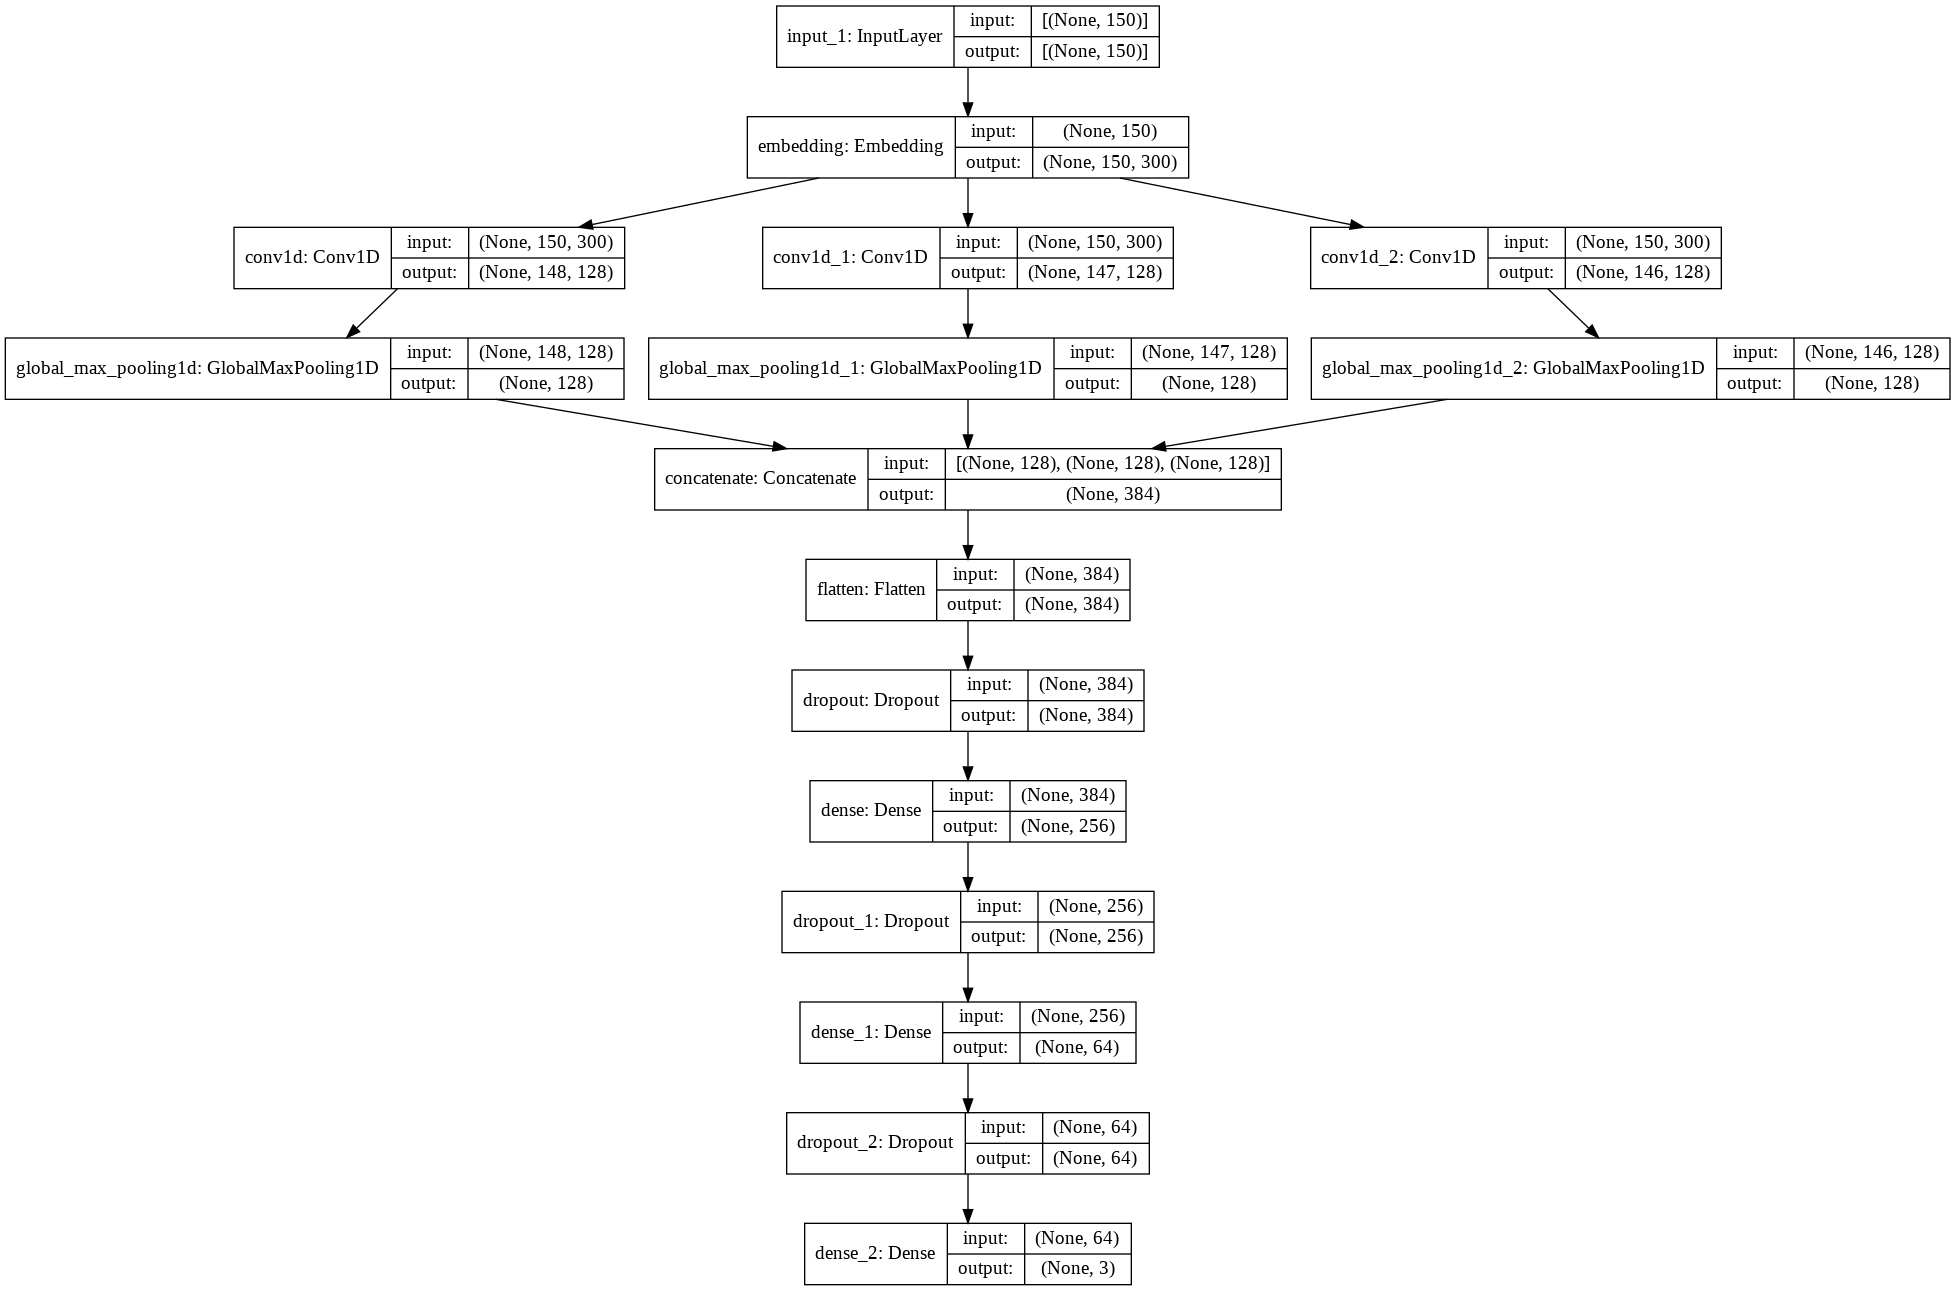

In [169]:
plot_model(fasttext_model1, 'model1.png', show_shapes=True)

In [172]:
reduce_lr=ReduceLROnPlateau(monitor='val_loss', factor=0.9,patience=1, verbose=0) # reducing the learning rate by 10% if the metric does not improve for each epoch
customMetrics=MetricsCustom((padded_text,y_train),(padded_text_cv,y_cv),threshold=0.5,save_as='fasttext_model1.hdf5') # Creating a class object for customMetrics class

callback_list=[reduce_lr,customMetrics]

fasttext_model1.fit(padded_text, y_train,batch_size=16,epochs=25,validation_data=(padded_text_cv,y_cv),callbacks=callback_list)

Epoch 1/25
417/417 [==============================] - 3s 6ms/step - loss: 2.1404 - val_loss: 2.1084
  -f1_score : 0.4047  -val_f1_score : 0.4254 
Epoch 2/25
417/417 [==============================] - 2s 6ms/step - loss: 2.0866 - val_loss: 2.0369
  -f1_score : 0.4375  -val_f1_score : 0.4484 
Epoch 3/25
417/417 [==============================] - 2s 6ms/step - loss: 2.0034 - val_loss: 1.9657
  -f1_score : 0.4631  -val_f1_score : 0.4526 
Epoch 4/25
417/417 [==============================] - 2s 6ms/step - loss: 1.9416 - val_loss: 1.8941
  -f1_score : 0.5005  -val_f1_score : 0.5070 
Epoch 5/25
417/417 [==============================] - 2s 6ms/step - loss: 1.9248 - val_loss: 1.8237
  -f1_score : 0.5207  -val_f1_score : 0.5274 
Epoch 6/25
417/417 [==============================] - 2s 6ms/step - loss: 1.8872 - val_loss: 1.8416
  -f1_score : 0.5239  -val_f1_score : 0.5279 
Epoch 7/25
417/417 [==============================] - 2s 6ms/step - loss: 1.8274 - val_loss: 1.7763
  -f1_score : 0.5121  -v

In [174]:
fasttext_model1.load_weights('fasttext_model1.hdf5')

In [246]:
model1_f1=get_f1_score(fasttext_model1,padded_text_test,y_test,0.5)
print('F1-macro : ',model1_f1)
results.loc[len(results.index)]=['CNN','Fasttext',model1_f1]

F1-macro :  0.6483317797256406


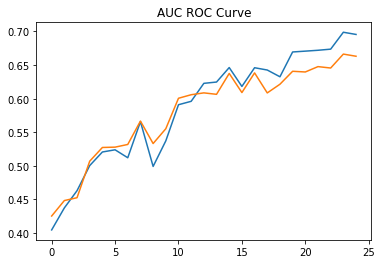

In [176]:
train_f1=customMetrics.f1_score_train
val_f1=customMetrics.f1_score_val
plt.plot(range(len(train_f1)),train_f1)
plt.plot(range(len(val_f1)),val_f1)
plt.title('AUC ROC Curve')
plt.show()

In [177]:
tf.keras.backend.clear_session() 
tf.get_logger().setLevel('INFO')
tf.random.set_seed(42)
glove_model1=get_model1(embedding_matrix_glove)
glove_model1.compile(optimizer=tf.keras.optimizers.Adam(1e-04,clipvalue=0.5),loss=loss_fn)

reduce_lr=ReduceLROnPlateau(monitor='val_loss', factor=0.9,patience=1, verbose=0) # reducing the learning rate by 10% if the metric does not improve for each epoch
customMetrics=MetricsCustom((padded_text,y_train),(padded_text_cv,y_cv),threshold=0.5,save_as='glove_model1.hdf5') # Creating a class object for customMetrics class

callback_list=[reduce_lr,customMetrics]

glove_model1.fit(padded_text, y_train,batch_size=16,epochs=25,validation_data=(padded_text_cv,y_cv),callbacks=callback_list)

Epoch 1/25
417/417 [==============================] - 4s 7ms/step - loss: 2.4842 - val_loss: 2.1837
  -f1_score : 0.3820  -val_f1_score : 0.3864 
Epoch 2/25
417/417 [==============================] - 2s 6ms/step - loss: 2.2030 - val_loss: 2.1772
  -f1_score : 0.3825  -val_f1_score : 0.3769 
Epoch 3/25
417/417 [==============================] - 2s 6ms/step - loss: 2.1519 - val_loss: 2.1675
  -f1_score : 0.4344  -val_f1_score : 0.4410 
Epoch 4/25
417/417 [==============================] - 2s 6ms/step - loss: 2.0837 - val_loss: 2.1149
  -f1_score : 0.4440  -val_f1_score : 0.4488 
Epoch 5/25
417/417 [==============================] - 2s 6ms/step - loss: 2.0986 - val_loss: 2.0695
  -f1_score : 0.4815  -val_f1_score : 0.4960 
Epoch 6/25
417/417 [==============================] - 2s 6ms/step - loss: 2.0435 - val_loss: 1.9572
  -f1_score : 0.5534  -val_f1_score : 0.5549 
Epoch 7/25
417/417 [==============================] - 2s 6ms/step - loss: 1.9303 - val_loss: 1.8913
  -f1_score : 0.5863  -v

In [178]:
glove_model1.load_weights('glove_model1.hdf5')

In [247]:
model1_f1=get_f1_score(glove_model1,padded_text_test,y_test,0.5)
print('F1-macro : ',model1_f1)
results.loc[len(results.index)]=['CNN','Glove',model1_f1]

F1-macro :  0.6555401316959965


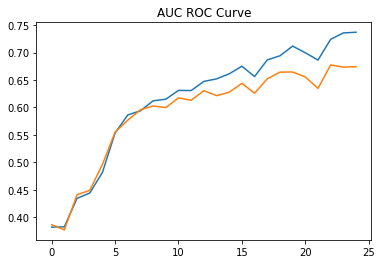

In [180]:
train_f1=customMetrics.f1_score_train
val_f1=customMetrics.f1_score_val
plt.plot(range(len(train_f1)),train_f1)
plt.plot(range(len(val_f1)),val_f1)
plt.title('AUC ROC Curve')
plt.show()

<h2><strong>Using LSTM Model
</strong><h2>

In [194]:
def get_model2(embeddings):
  
  input_layer=Input(shape=(inp_length))
  embedding_layer=Embedding(vocab_size,300,input_length=inp_length,name='embedding')(input_layer) 
  x=tf.keras.layers.Bidirectional(LSTM(128,return_sequences=True))(embedding_layer)
  x=tf.keras.layers.Bidirectional(LSTM(128))(x)
  x=Dense(512,activation='relu',kernel_initializer='he_normal')(x)
  x=Dropout(0.2)(x)
  x=Dense(128,activation='relu',kernel_initializer='he_normal')(x)
  x=Dense(64,activation='relu',kernel_initializer='he_normal')(x)
  output=Dense(3,activation='sigmoid')(x) 
  model2=keras.Model(input_layer,output)
  model2.get_layer('embedding').set_weights([embeddings])
  model2.get_layer('embedding').trainable=False

  return model2

In [195]:
tf.keras.backend.clear_session() 
tf.get_logger().setLevel('INFO')
fasttext_model2=get_model2(embedding_matrix_fasttext)
fasttext_model2.compile(optimizer=tf.keras.optimizers.Adam(1e-04,clipvalue=0.5),loss=loss_fn)

In [234]:
fasttext_model2.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 150, 300)          2601000   
_________________________________________________________________
bidirectional (Bidirectional (None, 150, 256)          439296    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256)               394240    
_________________________________________________________________
dense (Dense)                (None, 512)               131584    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664 

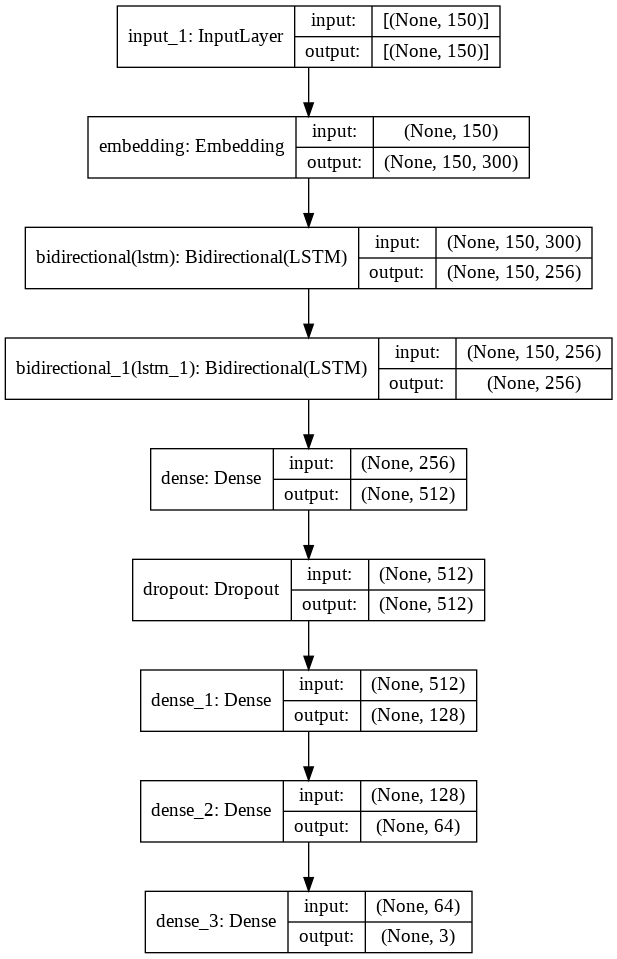

In [235]:
plot_model(fasttext_model2, 'model2.png', show_shapes=True)

In [196]:
reduce_lr=ReduceLROnPlateau(monitor='val_loss', factor=0.9,patience=1, verbose=0) # reducing the learning rate by 10% if the metric does not improve for each epoch

customMetrics=MetricsCustom((padded_text,y_train),(padded_text_cv,y_cv),threshold=0.5,save_as='fasttext_model2.hdf5') # Creating a class object for customMetrics class

callback_list=[reduce_lr,customMetrics]

fasttext_model2.fit(padded_text, y_train,batch_size=16,epochs=30,validation_data=(padded_text_cv,y_cv),callbacks=callback_list)

Epoch 1/30
417/417 [==============================] - 20s 33ms/step - loss: 2.1342 - val_loss: 2.1828
  -f1_score : 0.3416  -val_f1_score : 0.3420 
Epoch 2/30
417/417 [==============================] - 12s 30ms/step - loss: 2.0977 - val_loss: 2.1436
  -f1_score : 0.3412  -val_f1_score : 0.3410 
Epoch 3/30
417/417 [==============================] - 12s 30ms/step - loss: 2.0698 - val_loss: 2.1184
  -f1_score : 0.3561  -val_f1_score : 0.3558 
Epoch 4/30
417/417 [==============================] - 12s 30ms/step - loss: 2.0177 - val_loss: 2.0291
  -f1_score : 0.4714  -val_f1_score : 0.4771 
Epoch 5/30
417/417 [==============================] - 13s 30ms/step - loss: 2.0034 - val_loss: 2.0041
  -f1_score : 0.5202  -val_f1_score : 0.5236 
Epoch 6/30
417/417 [==============================] - 12s 30ms/step - loss: 2.0132 - val_loss: 1.9967
  -f1_score : 0.5010  -val_f1_score : 0.5204 
Epoch 7/30
417/417 [==============================] - 12s 30ms/step - loss: 1.9478 - val_loss: 1.9265
  -f1_scor

In [200]:
fasttext_model2.load_weights('fasttext_model2.hdf5')

In [248]:
model2_f1=get_f1_score(fasttext_model2,padded_text_test,y_test,0.5)
print('F1-macro : ',model2_f1)
results.loc[len(results.index)]=['LSTM','Fasttext',model2_f1]

F1-macro :  0.5993151960638978


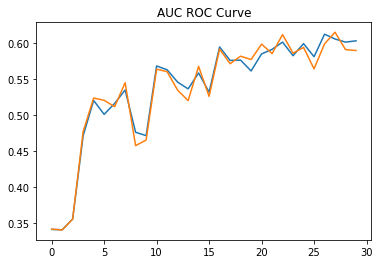

In [202]:
train_f1=customMetrics.f1_score_train
val_f1=customMetrics.f1_score_val
plt.plot(range(len(train_f1)),train_f1)
plt.plot(range(len(val_f1)),val_f1)
plt.title('AUC ROC Curve')
plt.show()

In [208]:
tf.keras.backend.clear_session() 
tf.get_logger().setLevel('INFO')
glove_model2=get_model2(embedding_matrix_glove)
glove_model2.compile(optimizer=tf.keras.optimizers.Adam(1e-04,clipvalue=0.5),loss=loss_fn)

reduce_lr=ReduceLROnPlateau(monitor='val_loss', factor=0.9,patience=1, verbose=0) # reducing the learning rate by 10% if the metric does not improve for each epoch

customMetrics=MetricsCustom((padded_text,y_train),(padded_text_cv,y_cv),threshold=0.5,save_as='glove_model2.hdf5') # Creating a class object for customMetrics class

callback_list=[reduce_lr,customMetrics]

glove_model2.fit(padded_text, y_train,batch_size=16,epochs=30,validation_data=(padded_text_cv,y_cv),callbacks=callback_list)

Epoch 1/30
417/417 [==============================] - 20s 33ms/step - loss: 2.1107 - val_loss: 2.0234
  -f1_score : 0.4305  -val_f1_score : 0.4549 
Epoch 2/30
417/417 [==============================] - 13s 30ms/step - loss: 1.8890 - val_loss: 1.8923
  -f1_score : 0.4880  -val_f1_score : 0.4807 
Epoch 3/30
417/417 [==============================] - 13s 30ms/step - loss: 1.8188 - val_loss: 1.8227
  -f1_score : 0.5715  -val_f1_score : 0.5754 
Epoch 4/30
417/417 [==============================] - 12s 30ms/step - loss: 1.7217 - val_loss: 1.6975
  -f1_score : 0.6022  -val_f1_score : 0.6123 
Epoch 5/30
417/417 [==============================] - 12s 30ms/step - loss: 1.6634 - val_loss: 1.6691
  -f1_score : 0.6241  -val_f1_score : 0.6129 
Epoch 6/30
417/417 [==============================] - 13s 30ms/step - loss: 1.6312 - val_loss: 1.6974
  -f1_score : 0.6085  -val_f1_score : 0.6045 
Epoch 7/30
417/417 [==============================] - 13s 30ms/step - loss: 1.6062 - val_loss: 1.6215
  -f1_scor

In [211]:
glove_model2.load_weights('glove_model2.hdf5')

In [249]:
model2_f1=get_f1_score(glove_model2,padded_text_test,y_test,0.5)
print('F1-macro : ',model2_f1)
results.loc[len(results.index)]=['LSTM','Glove',model2_f1]

F1-macro :  0.6652178350173066


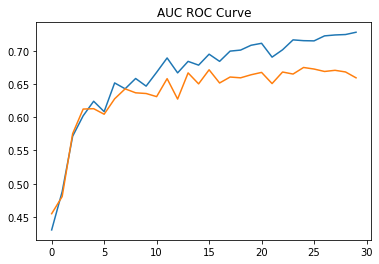

In [213]:
train_f1=customMetrics.f1_score_train
val_f1=customMetrics.f1_score_val
plt.plot(range(len(train_f1)),train_f1)
plt.plot(range(len(val_f1)),val_f1)
plt.title('AUC ROC Curve')
plt.show()

<h2><strong>Using CNN-LSTM Model

</strong><h2>

In [214]:
def get_model3(embeddings):
  input_layer=Input(shape=(inp_length))
  embedding_layer=Embedding(vocab_size,300,input_length=inp_length,name='embedding')(input_layer)
  #embedding_layer=tf.keras.layers.Reshape(target_shape=(inp_length,300,1))(embedding_layer)
  x=Conv1D(128,kernel_size=3,activation='relu',kernel_initializer='he_normal',padding='same')(embedding_layer)
  x=tf.keras.layers.MaxPool1D()(x)
  y=Conv1D(128,kernel_size=4,activation='relu',kernel_initializer='he_normal',padding='same')(embedding_layer)
  y=tf.keras.layers.MaxPool1D()(y)
  z=Conv1D(128,kernel_size=5,activation='relu',kernel_initializer='he_normal',padding='same')(embedding_layer)
  z=tf.keras.layers.MaxPool1D()(z)
  p=Conv1D(128,kernel_size=7,activation='relu',kernel_initializer='he_normal',padding='same')(embedding_layer)
  p=tf.keras.layers.MaxPool1D()(p)
  conv_layer=[x,y,z,p]
  x=Concatenate(axis=-1)(conv_layer) 
  x=Dropout(0.2)(x)
  x=tf.keras.layers.Bidirectional(LSTM(150))(x)
  x=Dropout(0.2)(x)
  x=Dense(256,activation='relu',kernel_initializer='he_normal')(x)
  x=Dropout(0.2)(x)
  x=Dense(128,activation='relu',kernel_initializer='he_normal')(x)
  x=Dropout(0.2)(x)
  x=Dense(64,activation='relu',kernel_initializer='he_normal')(x)
  output=Dense(3,activation='sigmoid')(x)
  model3=keras.Model(input_layer,output)
  model3.get_layer('embedding').set_weights([embeddings])
  model3.get_layer('embedding').trainable=False

  return model3

In [219]:
tf.keras.backend.clear_session() 
tf.get_logger().setLevel('INFO')
fasttext_model3=get_model3(embedding_matrix_fasttext)
fasttext_model3.compile(optimizer=tf.keras.optimizers.Adam(1e-03,clipvalue=0.5),loss=loss_fn)

In [238]:
fasttext_model3.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 150, 300)     2601000     input_1[0][0]                    
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 150, 128)     115328      embedding[0][0]                  
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 150, 128)     153728      embedding[0][0]                  
______________________________________________________________________________________________

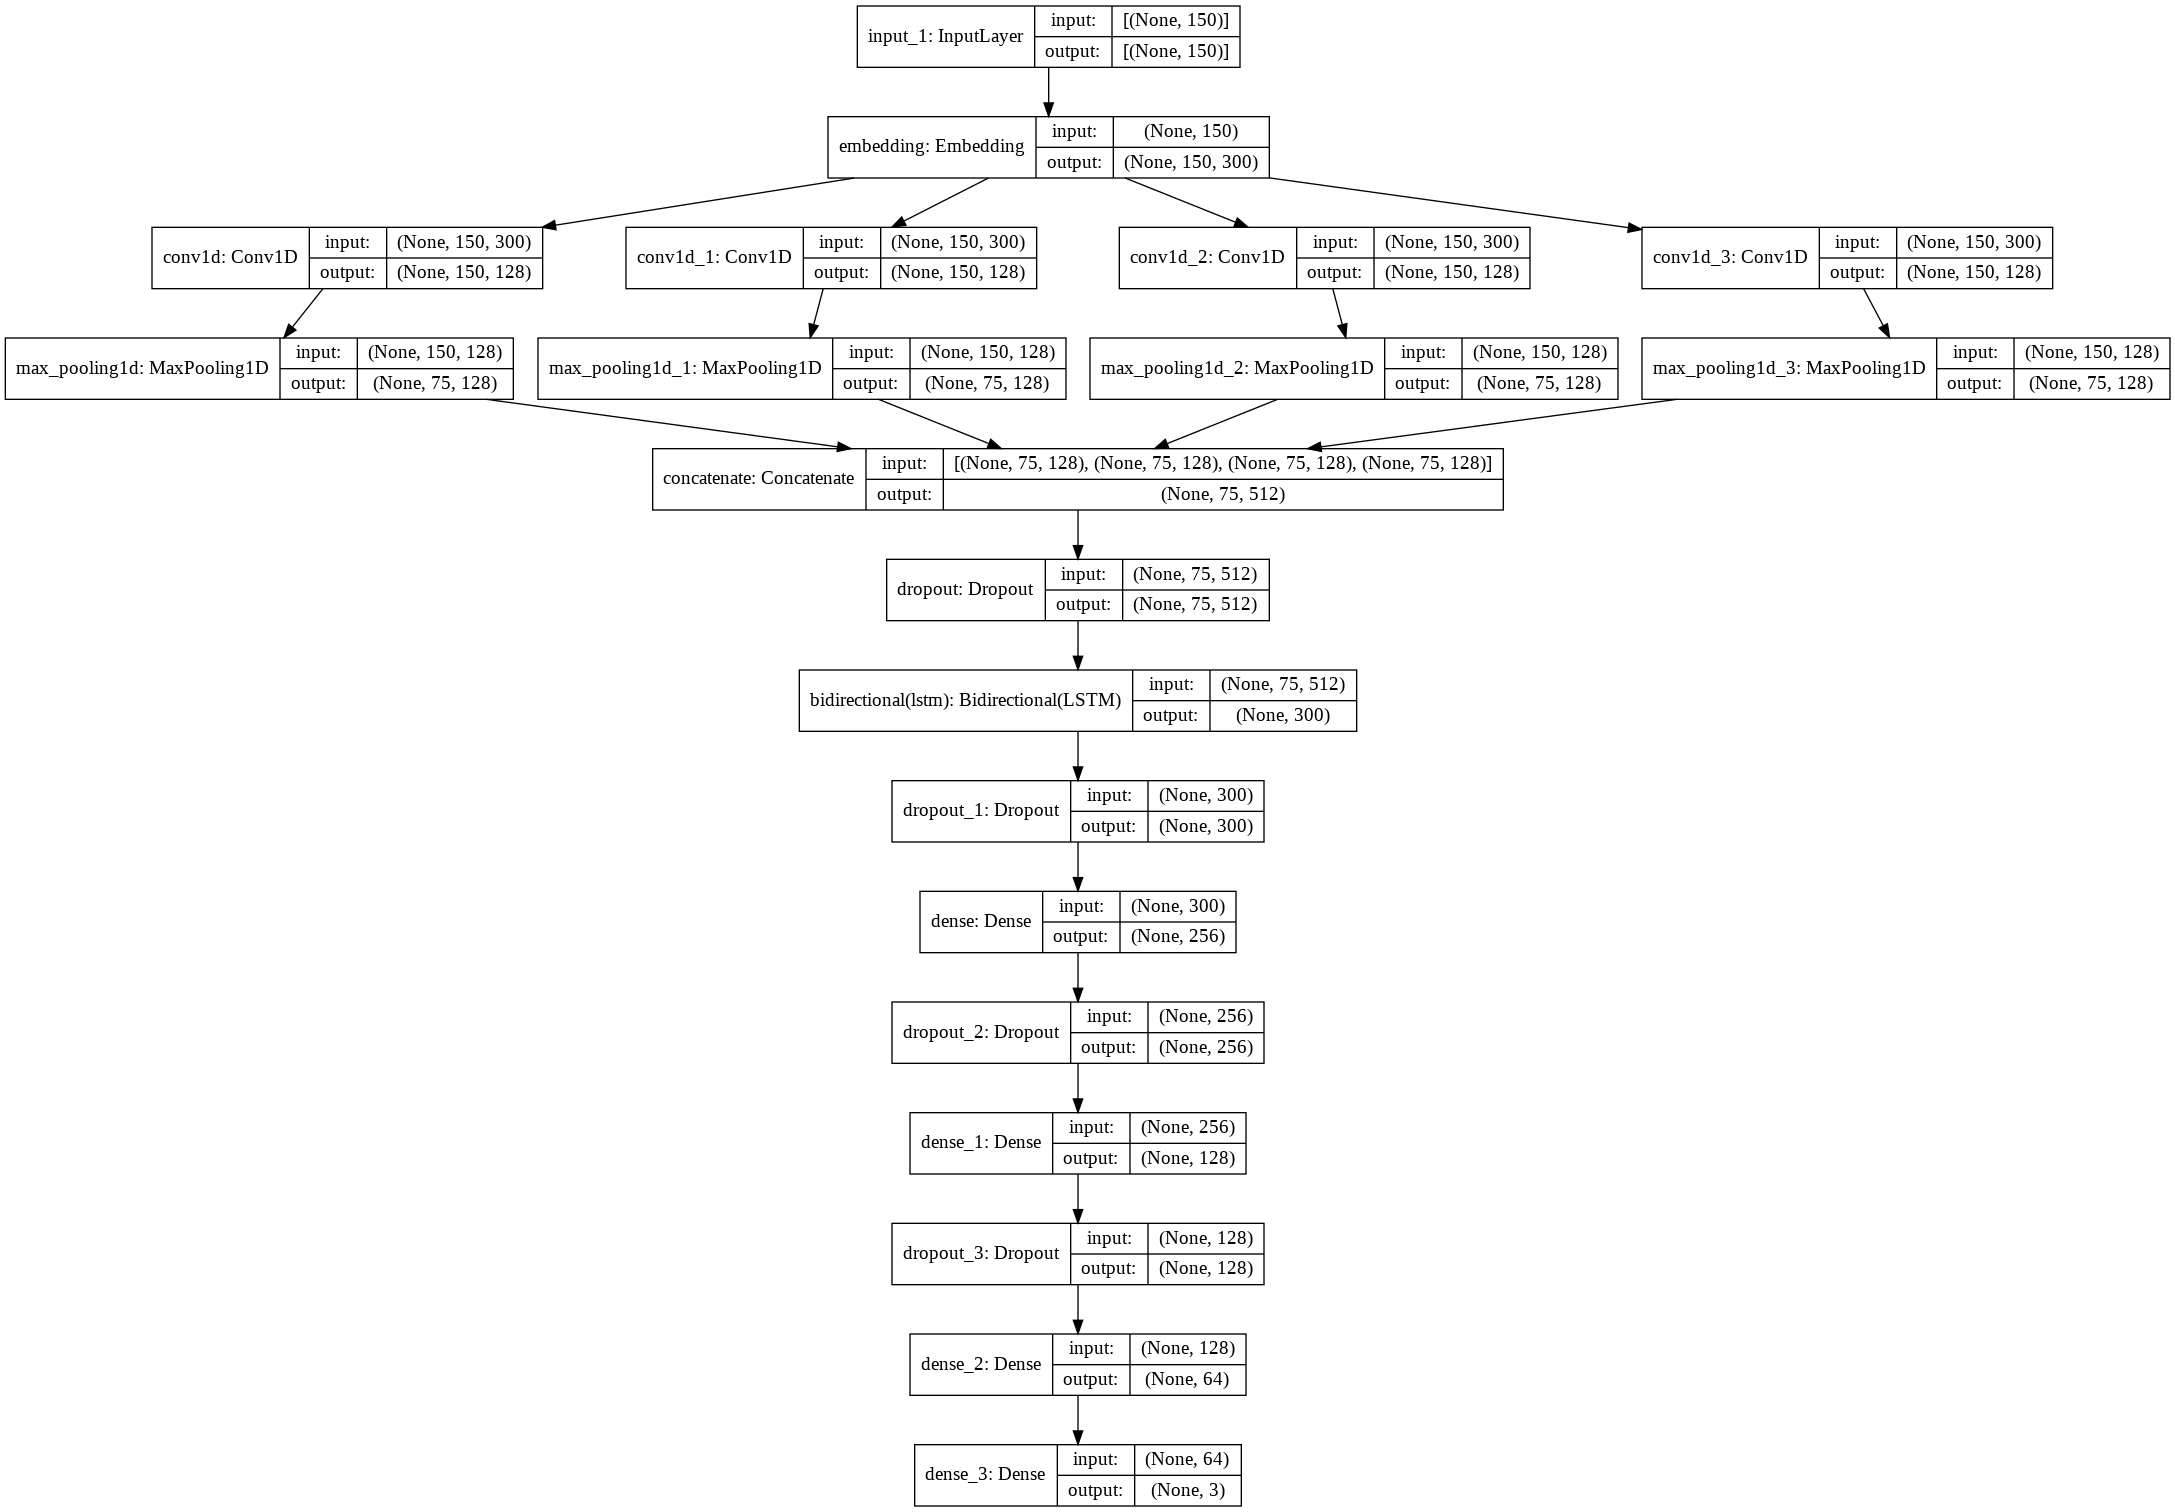

In [239]:
plot_model(fasttext_model3, 'model3.png', show_shapes=True)

In [220]:
reduce_lr=ReduceLROnPlateau(monitor='val_loss', factor=0.9,patience=1, verbose=0) # reducing the learning rate by 10% if the metric does not improve for each epoch

customMetrics=MetricsCustom((padded_text,y_train),(padded_text_cv,y_cv),threshold=0.5,save_as='fasttext_model3.hdf5') # Creating a class object for customMetrics class

callback_list=[reduce_lr,customMetrics]

fasttext_model3.fit(padded_text, y_train,batch_size=16,epochs=30,validation_data=(padded_text_cv,y_cv),callbacks=callback_list)

Epoch 1/30
417/417 [==============================] - 11s 18ms/step - loss: 2.1426 - val_loss: 2.1986
  -f1_score : 0.3182  -val_f1_score : 0.3161 
Epoch 2/30
417/417 [==============================] - 6s 15ms/step - loss: 2.1262 - val_loss: 2.1469
  -f1_score : 0.3409  -val_f1_score : 0.3395 
Epoch 3/30
417/417 [==============================] - 6s 15ms/step - loss: 2.0853 - val_loss: 2.0993
  -f1_score : 0.3876  -val_f1_score : 0.4062 
Epoch 4/30
417/417 [==============================] - 6s 15ms/step - loss: 2.0474 - val_loss: 2.0458
  -f1_score : 0.4383  -val_f1_score : 0.4564 
Epoch 5/30
417/417 [==============================] - 6s 15ms/step - loss: 2.0584 - val_loss: 1.9835
  -f1_score : 0.4778  -val_f1_score : 0.4867 
Epoch 6/30
417/417 [==============================] - 6s 15ms/step - loss: 2.0339 - val_loss: 1.9461
  -f1_score : 0.5135  -val_f1_score : 0.5253 
Epoch 7/30
417/417 [==============================] - 6s 15ms/step - loss: 1.9172 - val_loss: 1.8917
  -f1_score : 0.

In [223]:
fasttext_model3.load_weights('fasttext_model3.hdf5')

In [250]:
model2_f1=get_f1_score(fasttext_model3,padded_text_test,y_test,0.5)
print('F1-macro : ',model2_f1)
results.loc[len(results.index)]=['CNN-LSTM','Fasttext',model2_f1]

F1-macro :  0.6626002491157532


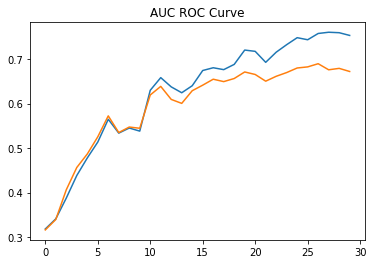

In [221]:
train_f1=customMetrics.f1_score_train
val_f1=customMetrics.f1_score_val
plt.plot(range(len(train_f1)),train_f1)
plt.plot(range(len(val_f1)),val_f1)
plt.title('AUC ROC Curve')
plt.show()

In [225]:
tf.keras.backend.clear_session() 
tf.get_logger().setLevel('INFO')
glove_model3=get_model3(embedding_matrix_glove)
glove_model3.compile(optimizer=tf.keras.optimizers.Adam(1e-03,clipvalue=0.5),loss=loss_fn)

reduce_lr=ReduceLROnPlateau(monitor='val_loss', factor=0.9,patience=1, verbose=0) # reducing the learning rate by 10% if the metric does not improve for each epoch

customMetrics=MetricsCustom((padded_text,y_train),(padded_text_cv,y_cv),threshold=0.5,save_as='glove_model3.hdf5') # Creating a class object for customMetrics class

callback_list=[reduce_lr,customMetrics]

glove_model3.fit(padded_text, y_train,batch_size=16,epochs=30,validation_data=(padded_text_cv,y_cv),callbacks=callback_list)

Epoch 1/30
417/417 [==============================] - 11s 17ms/step - loss: 2.1838 - val_loss: 2.2130
  -f1_score : 0.2055  -val_f1_score : 0.2221 
Epoch 2/30
417/417 [==============================] - 6s 15ms/step - loss: 2.0993 - val_loss: 2.1147
  -f1_score : 0.3711  -val_f1_score : 0.3858 
Epoch 3/30
417/417 [==============================] - 6s 15ms/step - loss: 2.0687 - val_loss: 2.0751
  -f1_score : 0.3670  -val_f1_score : 0.3754 
Epoch 4/30
417/417 [==============================] - 6s 15ms/step - loss: 2.0098 - val_loss: 1.9527
  -f1_score : 0.4618  -val_f1_score : 0.4571 
Epoch 5/30
417/417 [==============================] - 6s 15ms/step - loss: 1.8925 - val_loss: 1.7980
  -f1_score : 0.5704  -val_f1_score : 0.5471 
Epoch 6/30
417/417 [==============================] - 7s 16ms/step - loss: 1.7798 - val_loss: 1.7654
  -f1_score : 0.4951  -val_f1_score : 0.4636 
Epoch 7/30
417/417 [==============================] - 7s 16ms/step - loss: 1.7385 - val_loss: 1.8707
  -f1_score : 0.

In [227]:
glove_model3.load_weights('glove_model3.hdf5')

In [251]:
model2_f1=get_f1_score(glove_model3,padded_text_test,y_test,0.5)
print('F1-macro : ',model2_f1)
results.loc[len(results.index)]=['CNN-LSTM','Glove',model2_f1]

F1-macro :  0.6391415669480648


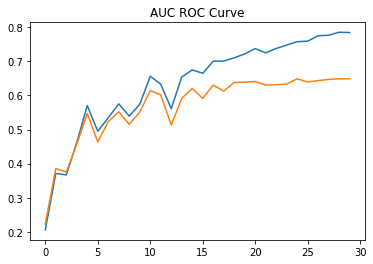

In [231]:
train_f1=customMetrics.f1_score_train
val_f1=customMetrics.f1_score_val
plt.plot(range(len(train_f1)),train_f1)
plt.plot(range(len(val_f1)),val_f1)
plt.title('AUC ROC Curve')
plt.show()

In [252]:
results[results['F1-Macro']>0.62]

,Model,Word Embeddings,F1-Macro
4,Logistic Regression,Fasttext,0.625004
6,Logistic Regression,Glove,0.628886
10,SVM,Glove,0.631659
24,LightGBM,Glove,0.639473
25,Stacking Classifier,Glove,0.639473
26,CNN,Fasttext,0.648332
27,CNN,Glove,0.655540
29,LSTM,Glove,0.665218
30,CNN-LSTM,Fasttext,0.662600
31,CNN-LSTM,Glove,0.639142
